# Bank Marketing
**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution (with 10% of the examples (4119), randomly selected from main dataset, and 20 inputs.). The classification goal is to predict if the client will subscribe a term deposit.**

In [1]:
from urllib.request import urlretrieve
url="https://raw.githubusercontent.com/akhiljp5352/Datasets/main/bank-additional-full.csv"
filename_to_save="bank-additional-full.csv"
urlretrieve(url,filename_to_save)

('bank-additional-full.csv', <http.client.HTTPMessage at 0x190d1eb89d0>)

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get the Data
**Read in the bank-additional-full.csv file and set it to a data frame called data.**

In [3]:
bankdata1 = pd.read_csv("bank-additional-full.csv",delimiter=';')

**Print the first rows of the dataframe**

In [4]:
bankdata1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Cleaning the data¶

**Convert the values of 'y' column to 1 or 0 in a new column 'Y'**

In [5]:
bankdata1['Y']=pd.Series(np.where(bankdata1.y.values == 'yes', 1, 0),
          bankdata1.index)

In [6]:
bankdata1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


**Checking for empty entries**

In [7]:
bankdata1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
Y                 0
dtype: int64

In [8]:
bankdata1['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [9]:
bankdata1['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [10]:
bankdata1['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [11]:
print("Default \t",bankdata1['default'].unique())
print("Loan \t",bankdata1['loan'].unique())
print("Housing \t",bankdata1['housing'].unique())
print("contact \t",bankdata1['contact'].unique())
print("poutcome \t",bankdata1['poutcome'].unique())
print("day_of_week \t",bankdata1['day_of_week'].unique())
print("month \t",bankdata1['month'].unique())

Default 	 ['no' 'unknown' 'yes']
Loan 	 ['no' 'yes' 'unknown']
Housing 	 ['no' 'yes' 'unknown']
contact 	 ['telephone' 'cellular']
poutcome 	 ['nonexistent' 'failure' 'success']
day_of_week 	 ['mon' 'tue' 'wed' 'thu' 'fri']
month 	 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [12]:
bankdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
print("Default \n",bankdata1['default'].value_counts())
print("\n")
print("Loan \n",bankdata1['loan'].value_counts())
print("\n")
print("Housing \n",bankdata1['housing'].value_counts())
print("\n")
print("contact \n",bankdata1['contact'].value_counts())
print("\n")
print("poutcome \n",bankdata1['poutcome'].value_counts())

Default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64


Loan 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


Housing 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


contact 
 cellular     26144
telephone    15044
Name: contact, dtype: int64


poutcome 
 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


**Delete the rows which column 'poutcome' contains 'nonexistent'**

In [14]:
condition = bankdata1.poutcome == 'nonexistent'
bankdata2 = bankdata1.drop(bankdata1[condition].index, axis = 0, inplace = False)

In [15]:
bankdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 24013 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5625 non-null   int64  
 1   job             5625 non-null   object 
 2   marital         5625 non-null   object 
 3   education       5625 non-null   object 
 4   default         5625 non-null   object 
 5   housing         5625 non-null   object 
 6   loan            5625 non-null   object 
 7   contact         5625 non-null   object 
 8   month           5625 non-null   object 
 9   day_of_week     5625 non-null   object 
 10  duration        5625 non-null   int64  
 11  campaign        5625 non-null   int64  
 12  pdays           5625 non-null   int64  
 13  previous        5625 non-null   int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    5625 non-null   float64
 16  cons.price.idx  5625 non-null   float64
 17  cons.conf.idx   5625 non-nul

**Replace 'unknown' in job and education with 'other'**

In [16]:
bankdata2[['job','education']] = bankdata1[['job','education']].replace(['unknown'],'other')

**Identifying Outliers using Zscore and Boxplot in Numeric Column**

**Calculate mean, standard deviation, zscore of age column and delete the outliers**

C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

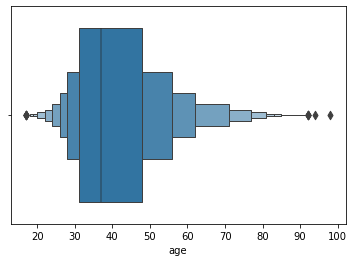

In [17]:
sns.boxenplot(bankdata2['age'])

In [18]:
# Calculate mean, standard deviation

mean = np.mean(bankdata2[['age']])
std = np.std(bankdata2[['age']])
print('mean of the dataset is', mean)
print('std. deviation is', std)

from scipy.stats import zscore
bankdata2['outliers'] = bankdata2['age']
bankdata2['outliers']= zscore(bankdata2['outliers'])

condition1 = (bankdata2['outliers']>3) | (bankdata2['outliers']<-3 )
bankdata3 = bankdata2.drop(bankdata2[condition1].index, axis = 0, inplace = False)


mean of the dataset is age    40.453156
dtype: float64
std. deviation is age    12.628827
dtype: float64


**Calculate mean, standard deviation, zscore of duration column and delete the outliers**

C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

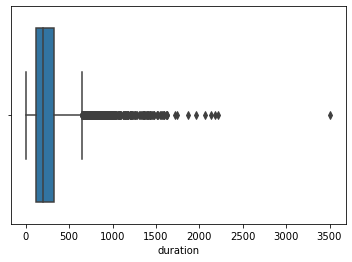

In [19]:
sns.boxplot(bankdata3['duration'])

In [20]:
# Calculate mean, standard deviation

mean = np.mean(bankdata3[['duration']])
std = np.std(bankdata3[['duration']])
print('mean of the dataset is', mean)
print('std. deviation is', std)

from scipy.stats import zscore
bankdata3['outliers_d'] = bankdata3['duration']
bankdata3['outliers_d']= zscore(bankdata3['outliers_d'])

condition2 = (bankdata3['outliers_d']>3) | (bankdata3['outliers_d']<-3 )
bankdata4 = bankdata3.drop(bankdata3[condition2].index, axis = 0, inplace = False)

mean of the dataset is duration    265.360756
dtype: float64
std. deviation is duration    239.668411
dtype: float64


**Calculate mean, standard deviation, zscore of campaign column and delete the outliers**

C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

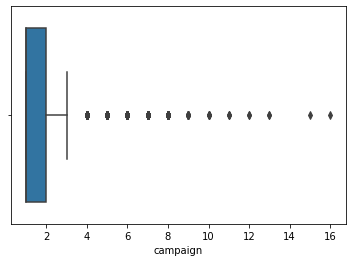

In [21]:
sns.boxplot(bankdata4['campaign'])

In [22]:
# Calculate mean, standard deviation

mean = np.mean(bankdata4[['campaign']])
std = np.std(bankdata4[['campaign']])
print('mean of the dataset is', mean)
print('std. deviation is', std)

from scipy.stats import zscore
bankdata4['outliers_c'] = bankdata4['campaign']
bankdata4['outliers_c']= zscore(bankdata4['outliers_c'])

condition3 = (bankdata4['outliers_c']>3) | (bankdata4['outliers_c']<-3 )
bankdata = bankdata4.drop(bankdata4[condition3].index, axis = 0, inplace = False)

mean of the dataset is campaign    1.956107
dtype: float64
std. deviation is campaign    1.44622
dtype: float64


# Exploratory Data Analysis

## Percentage of Response (yes/no) across various parameters

<ipython-input-23-9d6dce1f67bf>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(100,15))


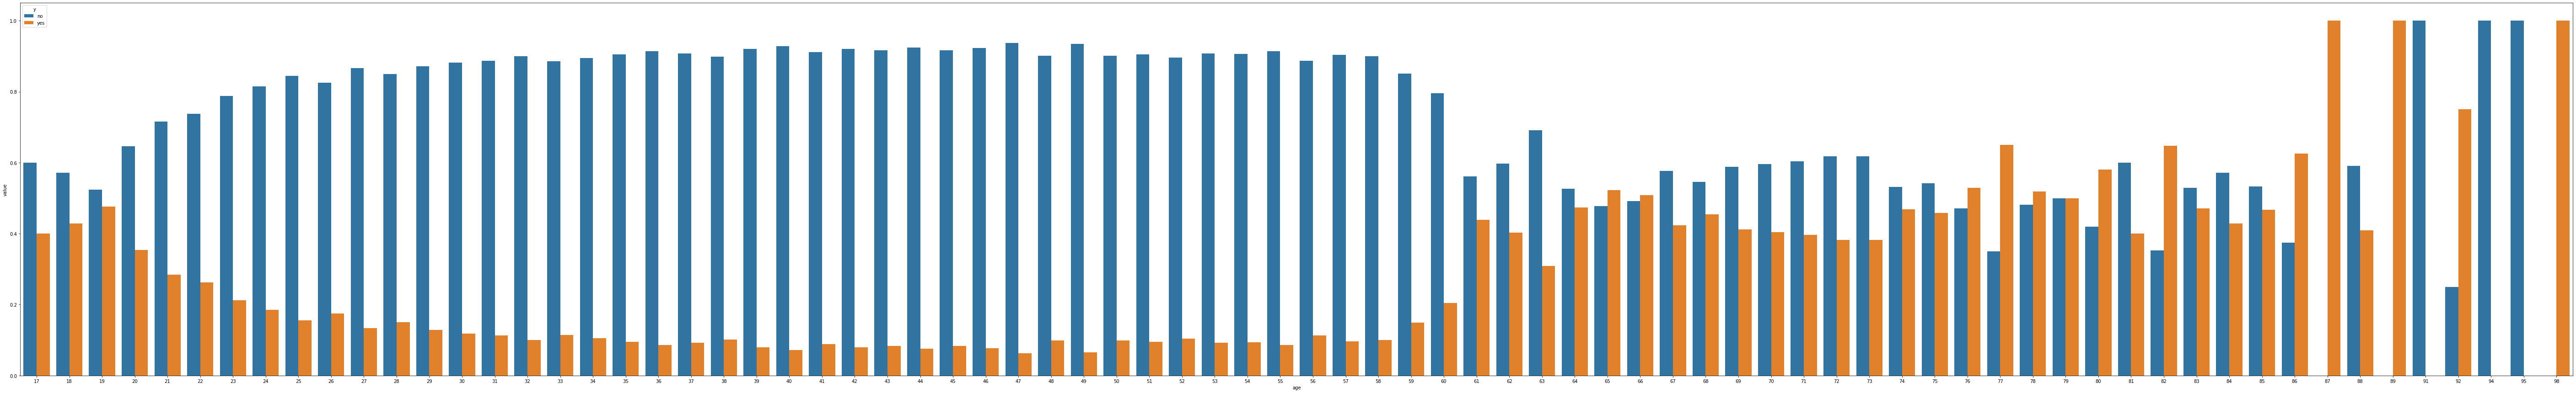

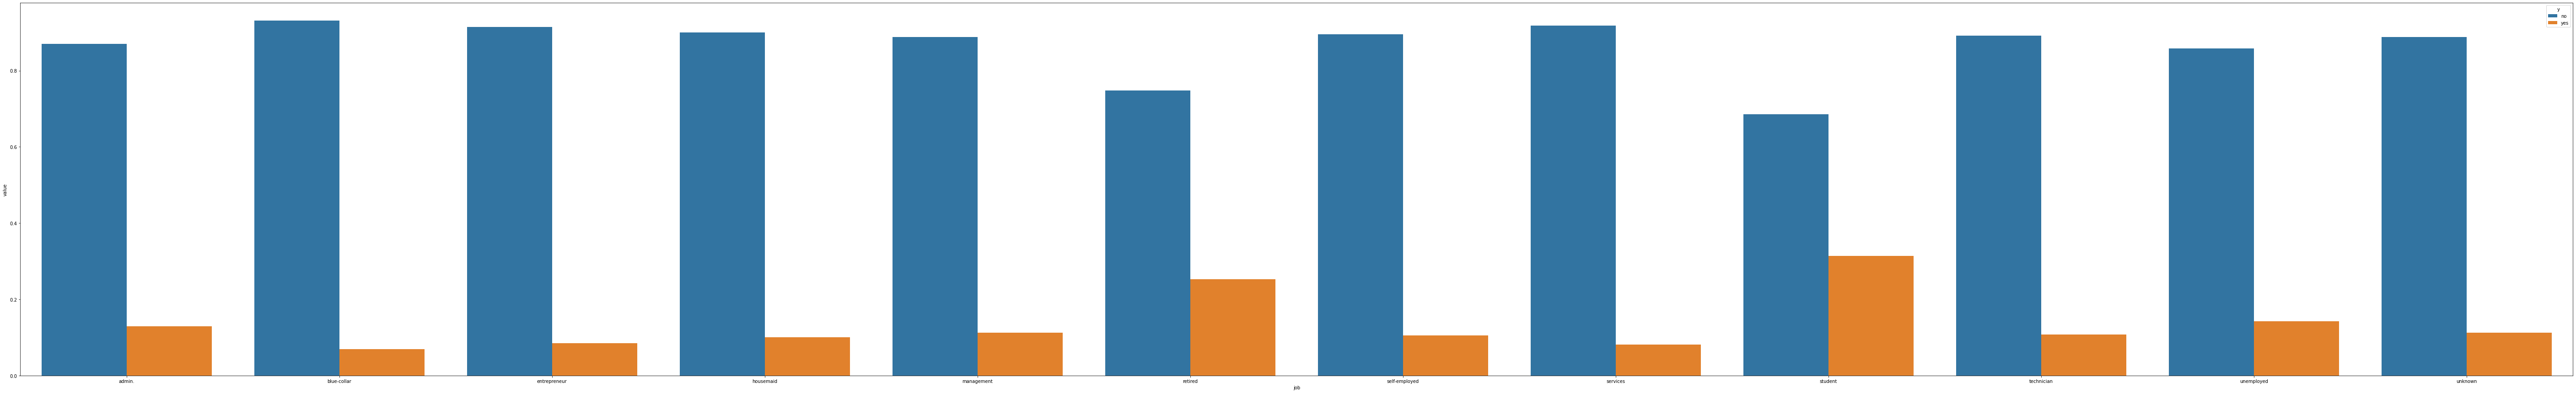

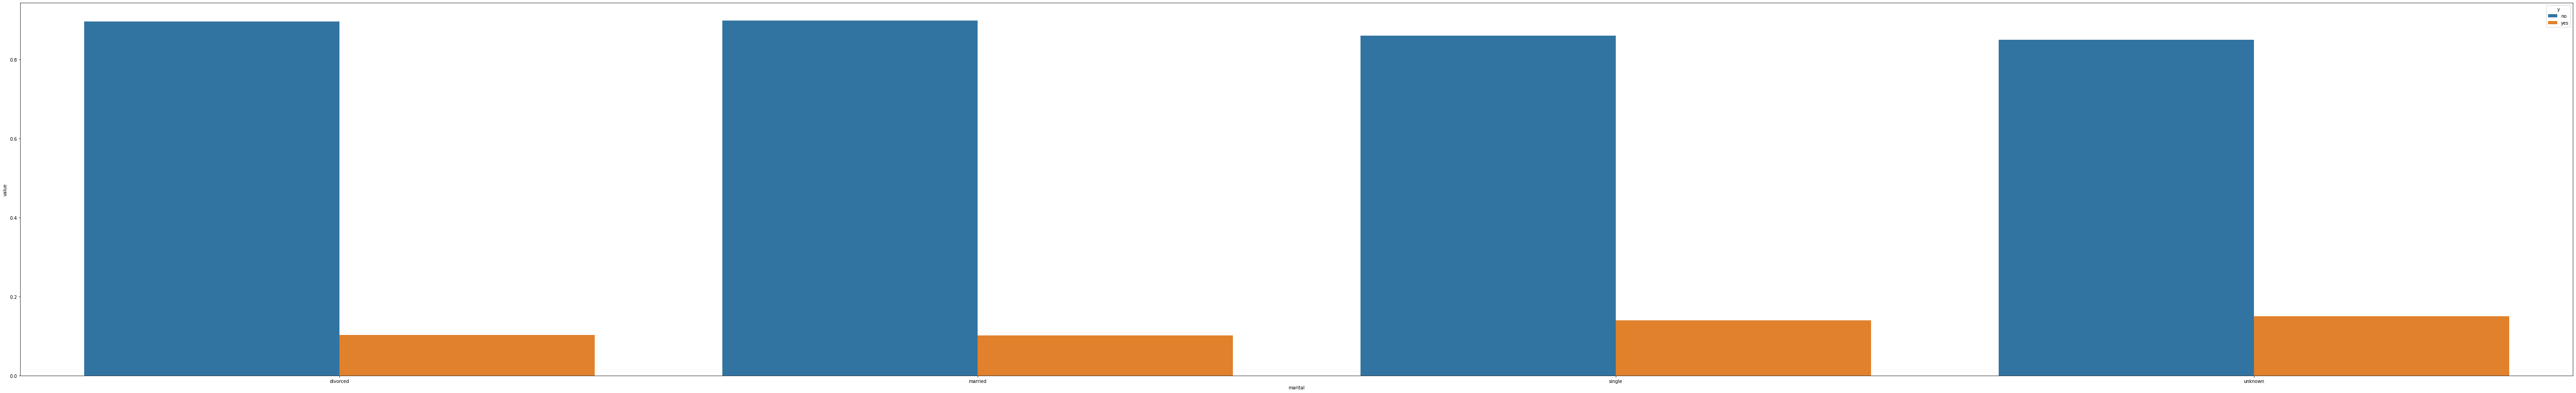

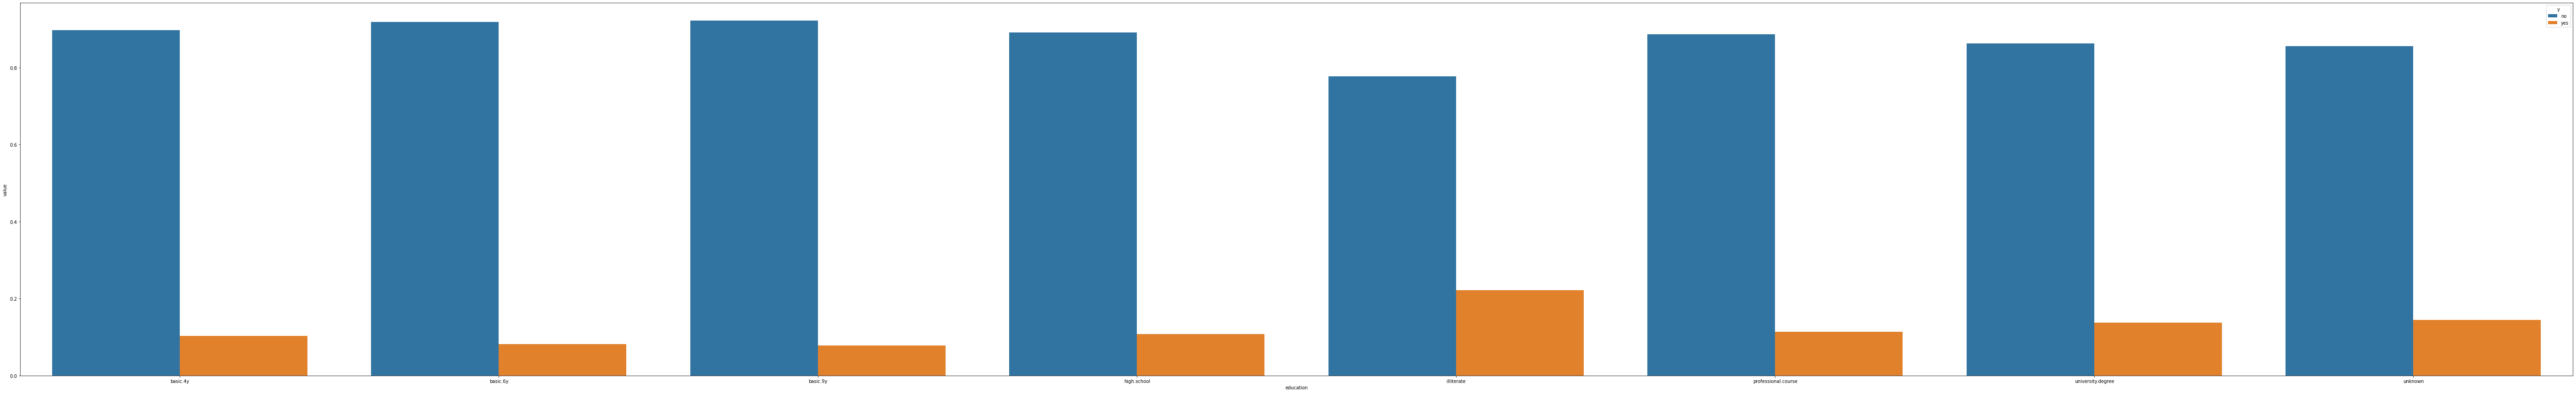

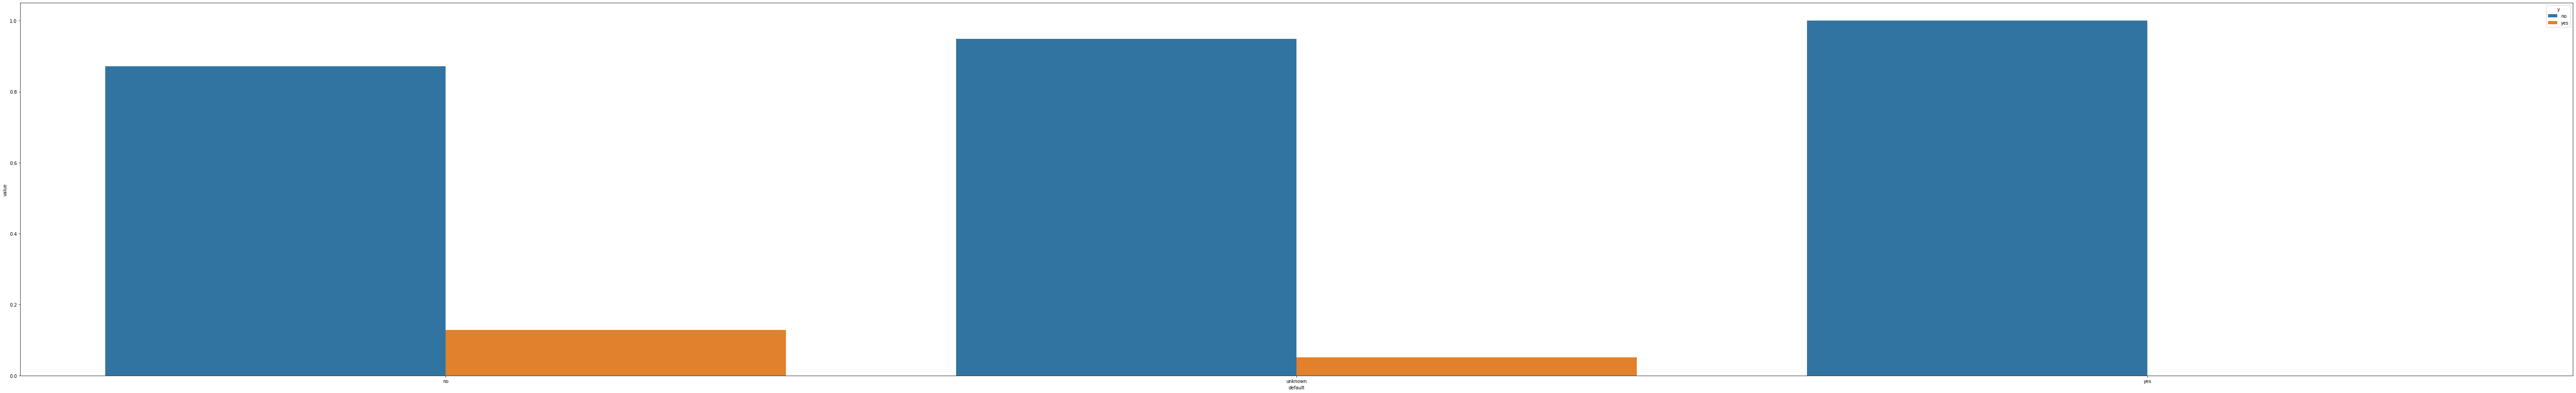

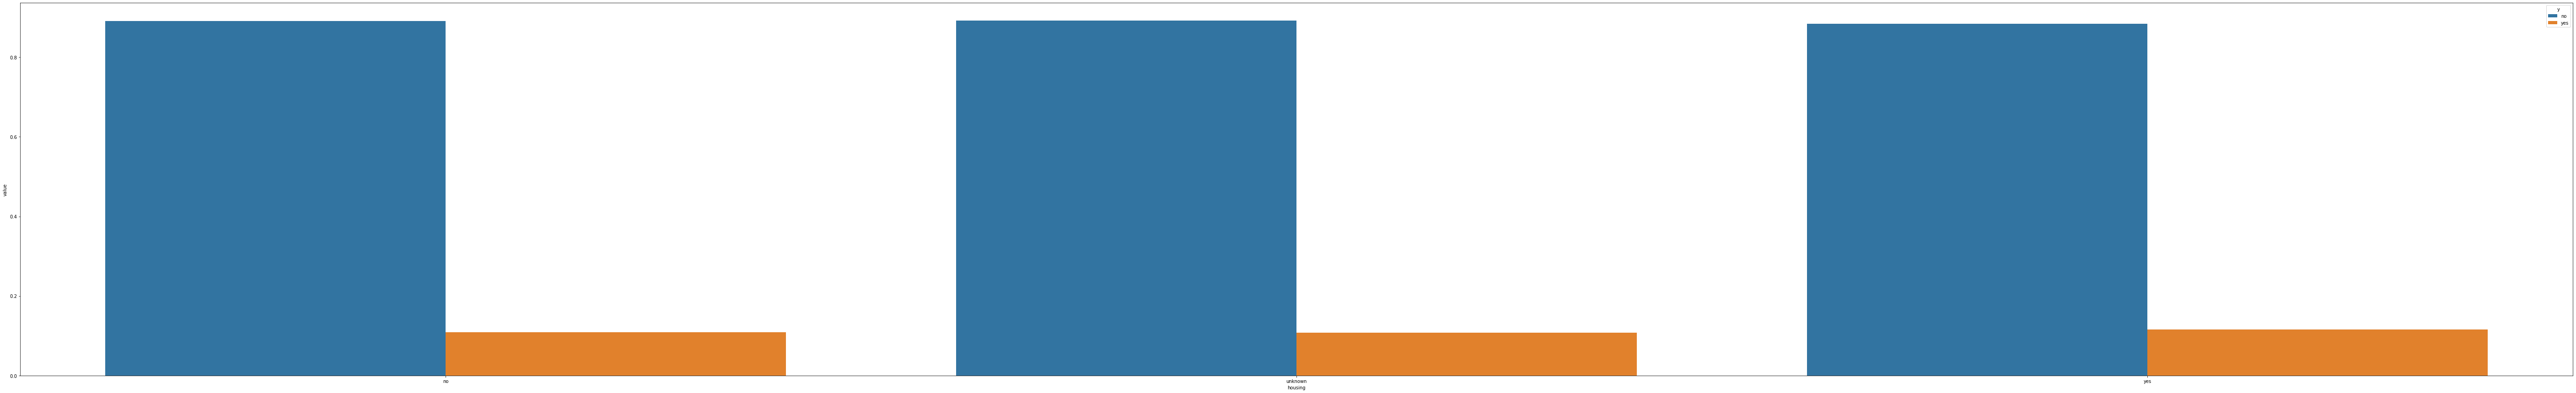

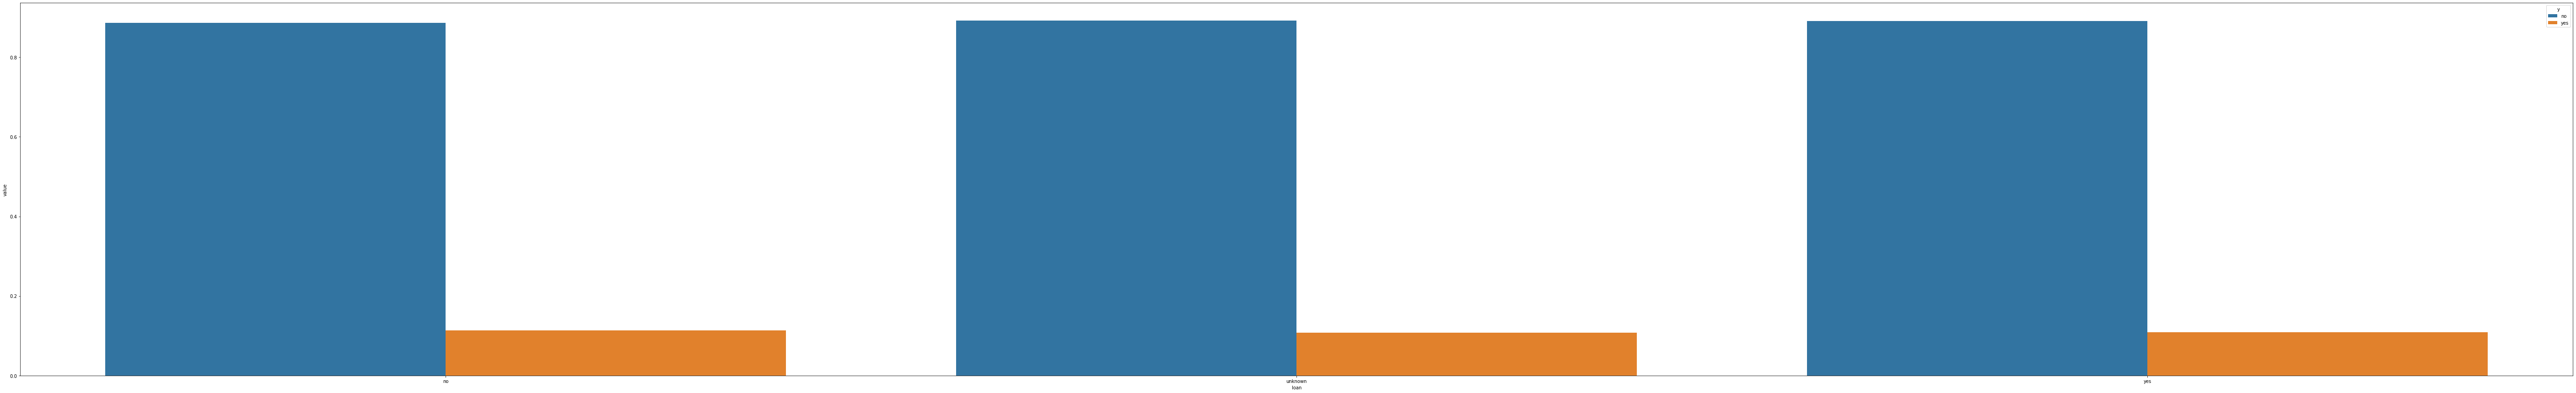

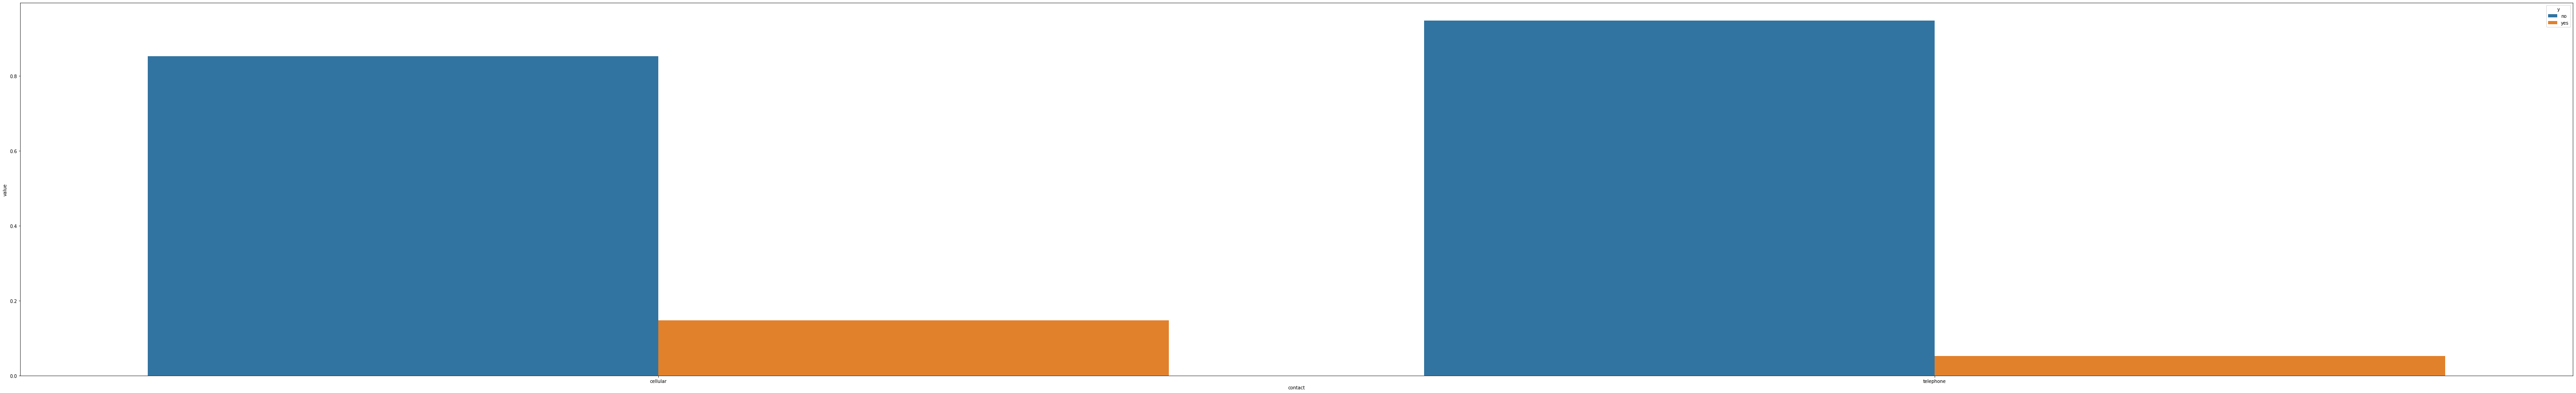

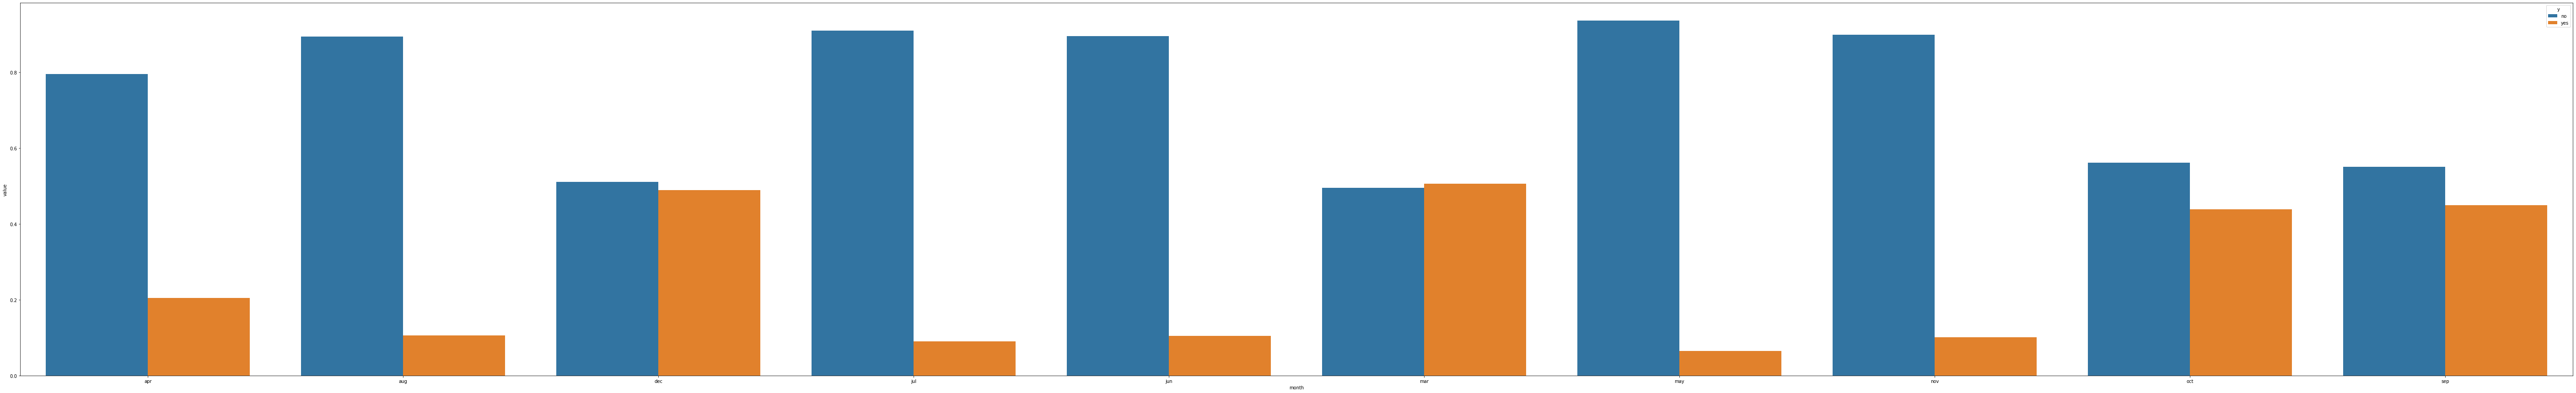

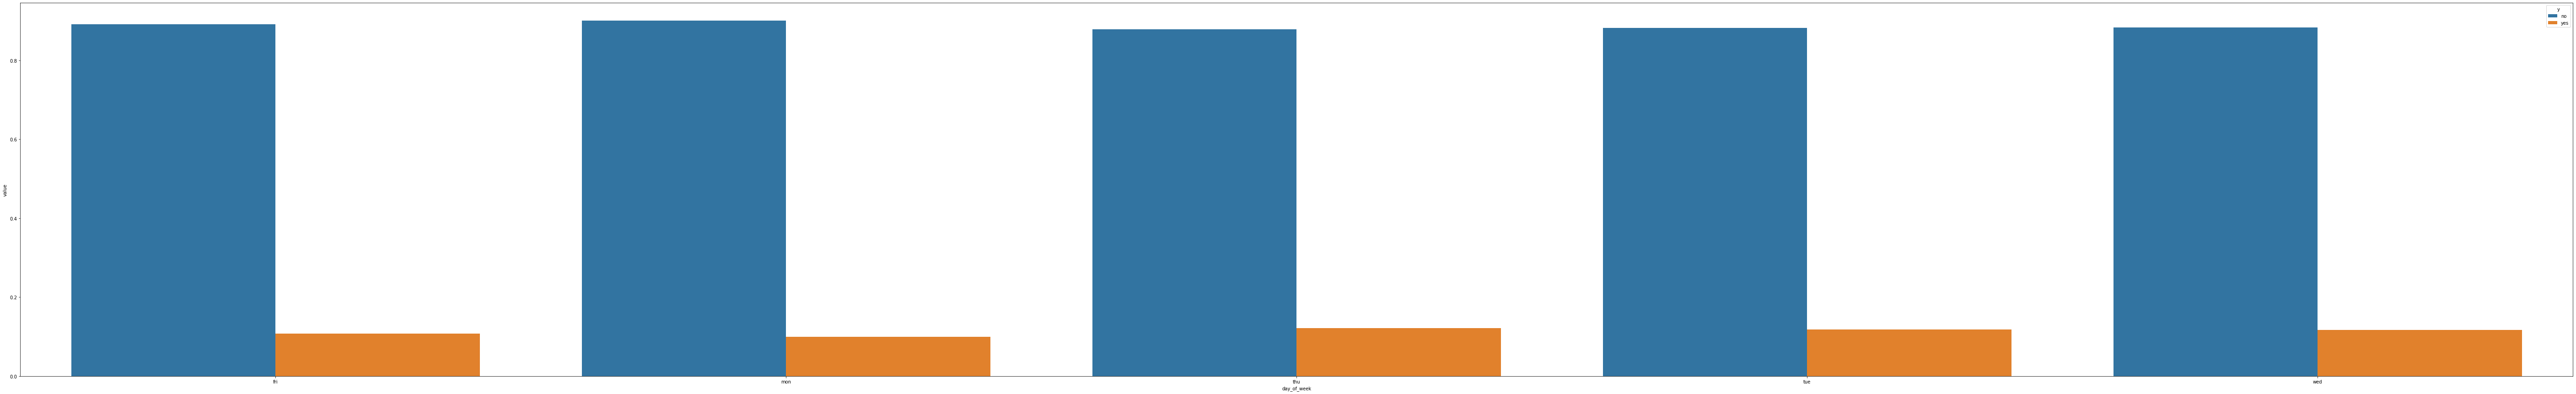

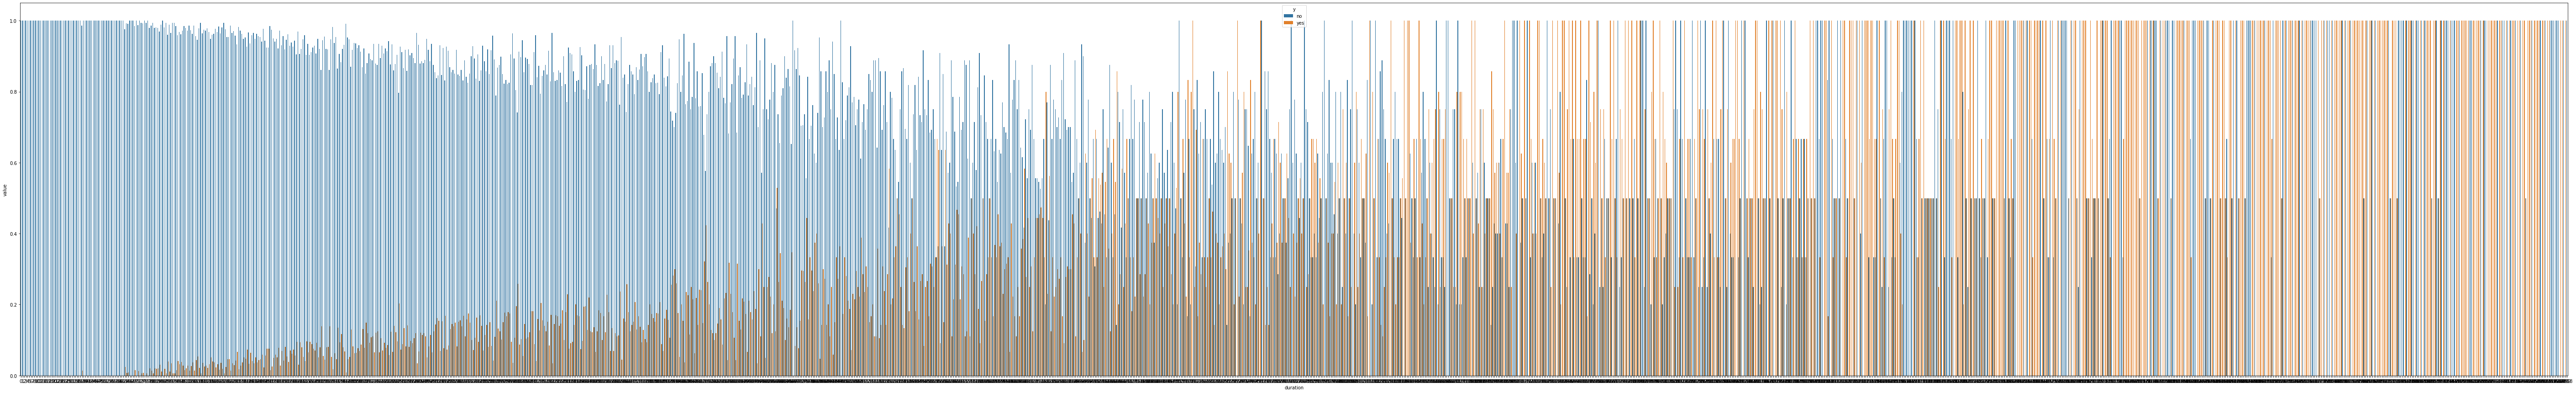

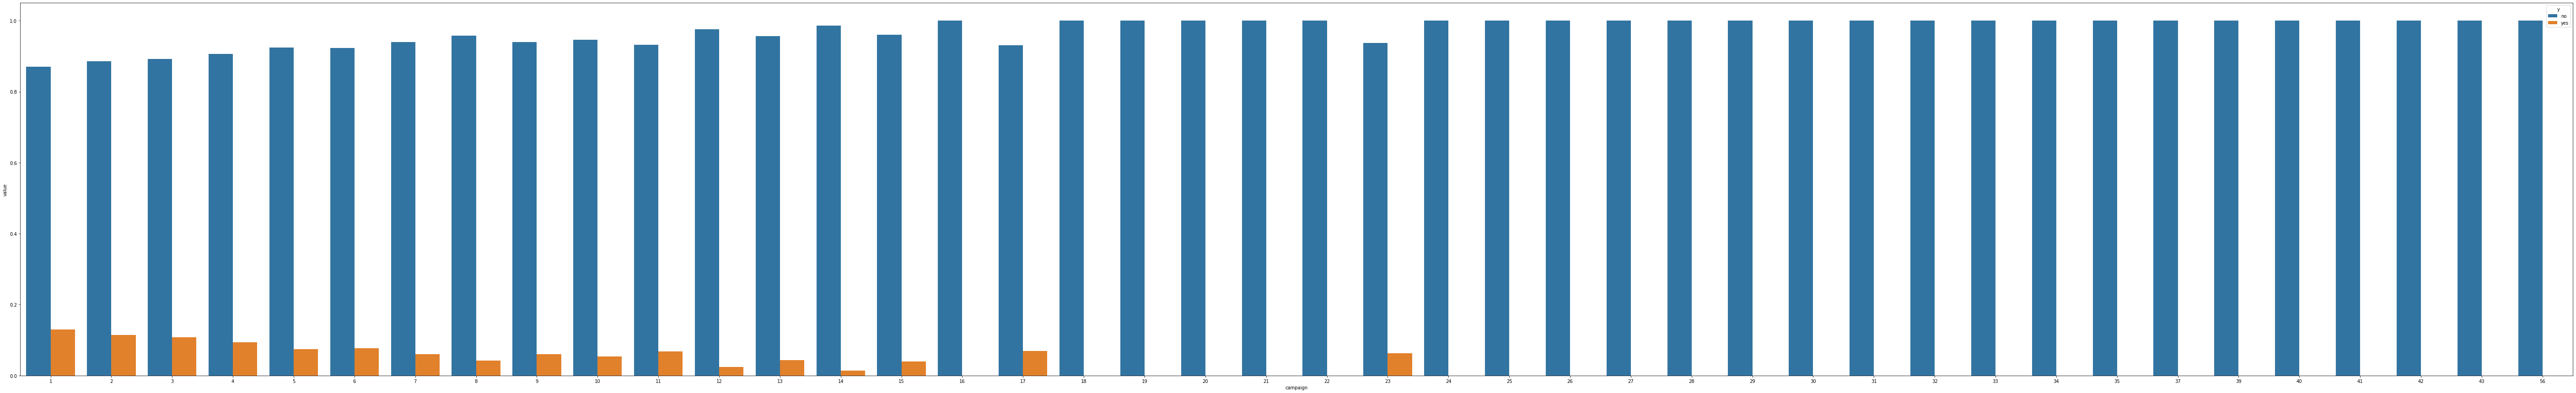

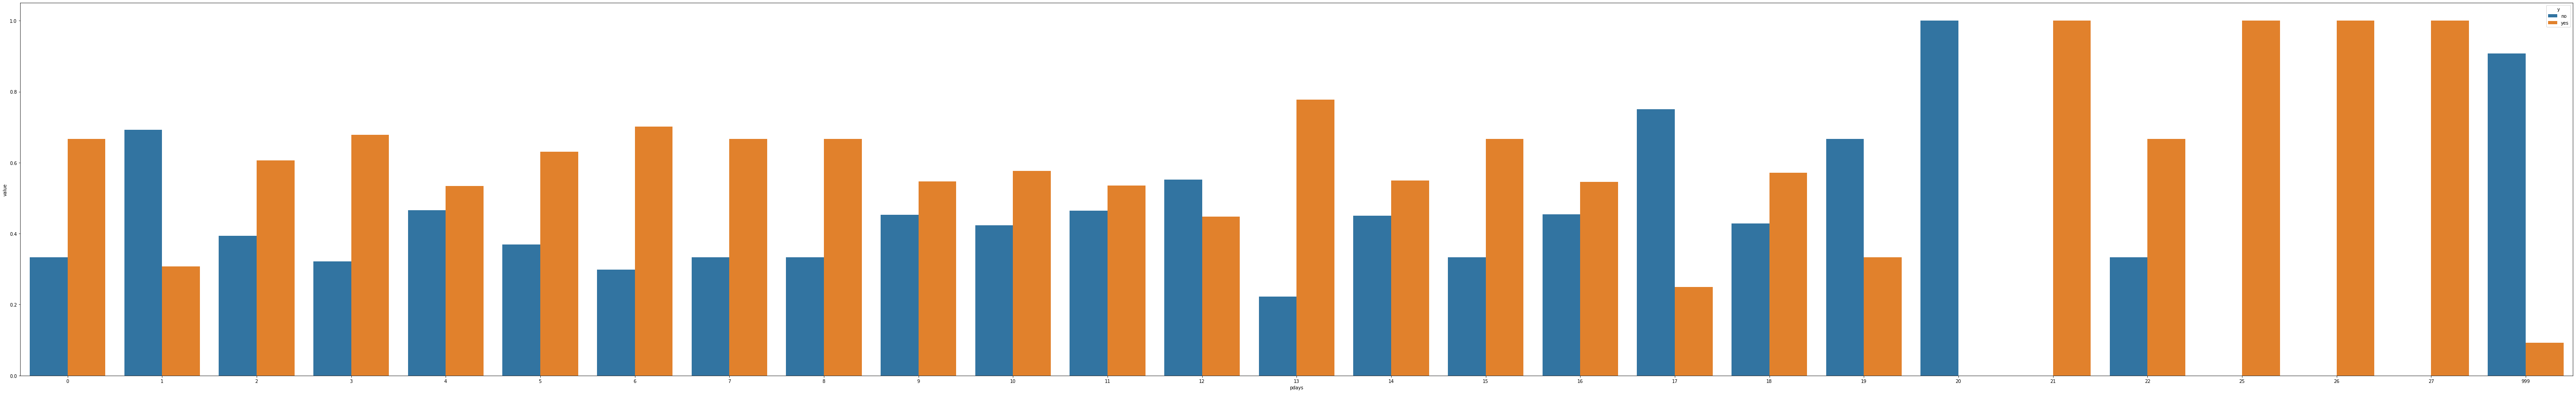

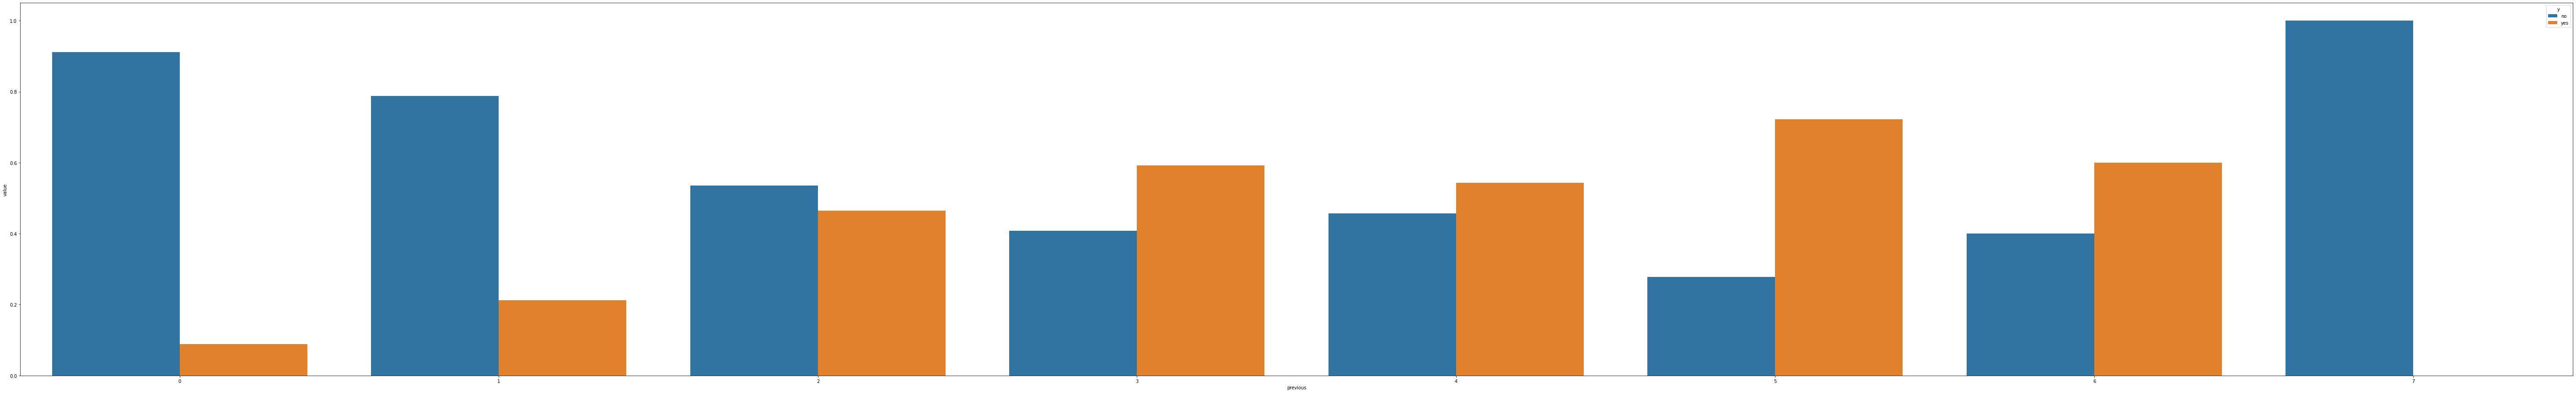

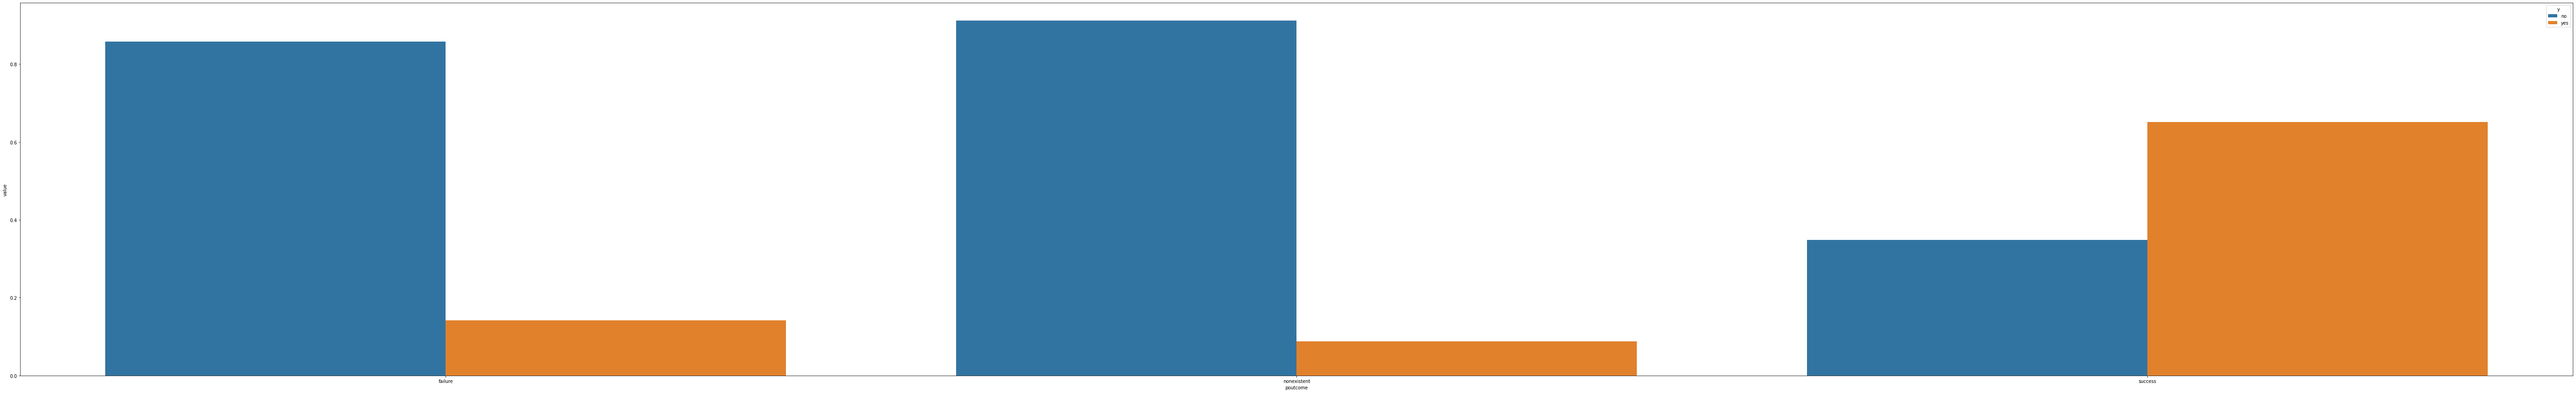

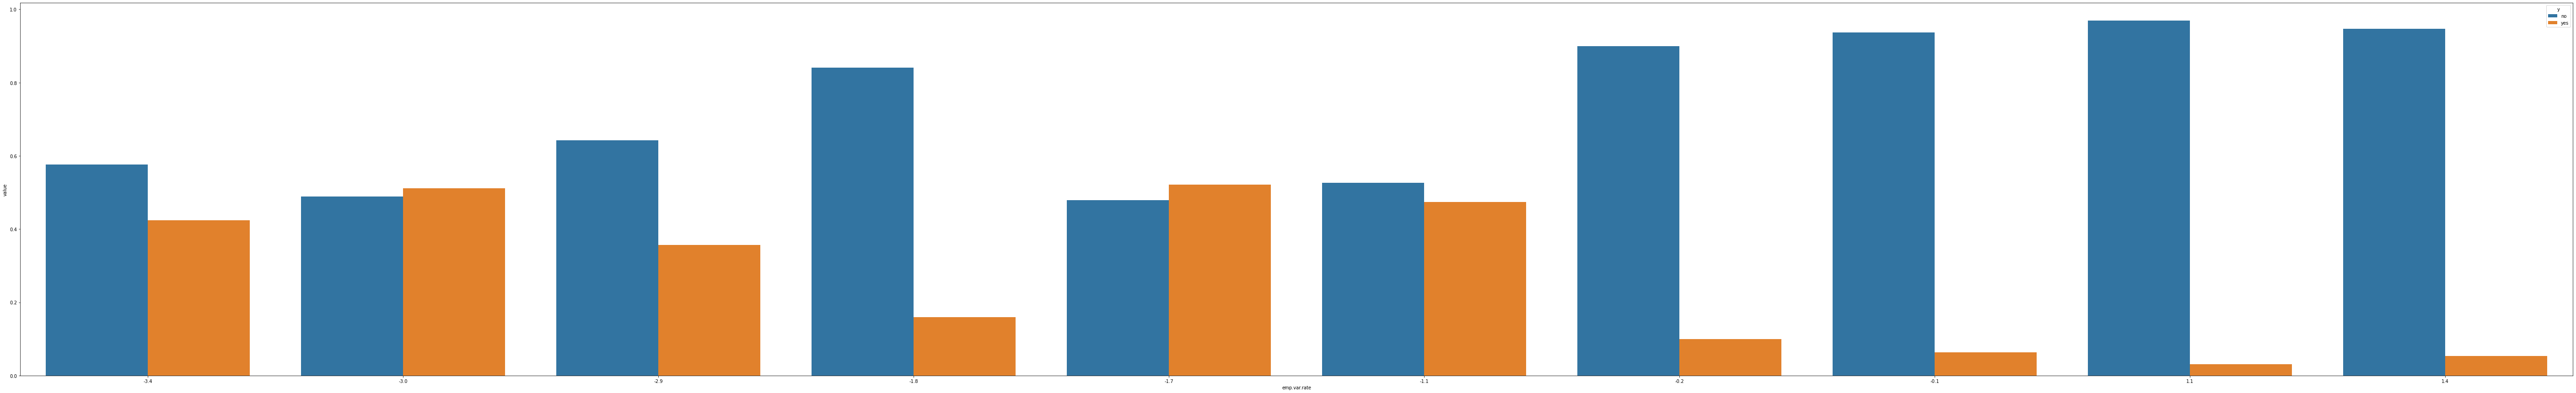

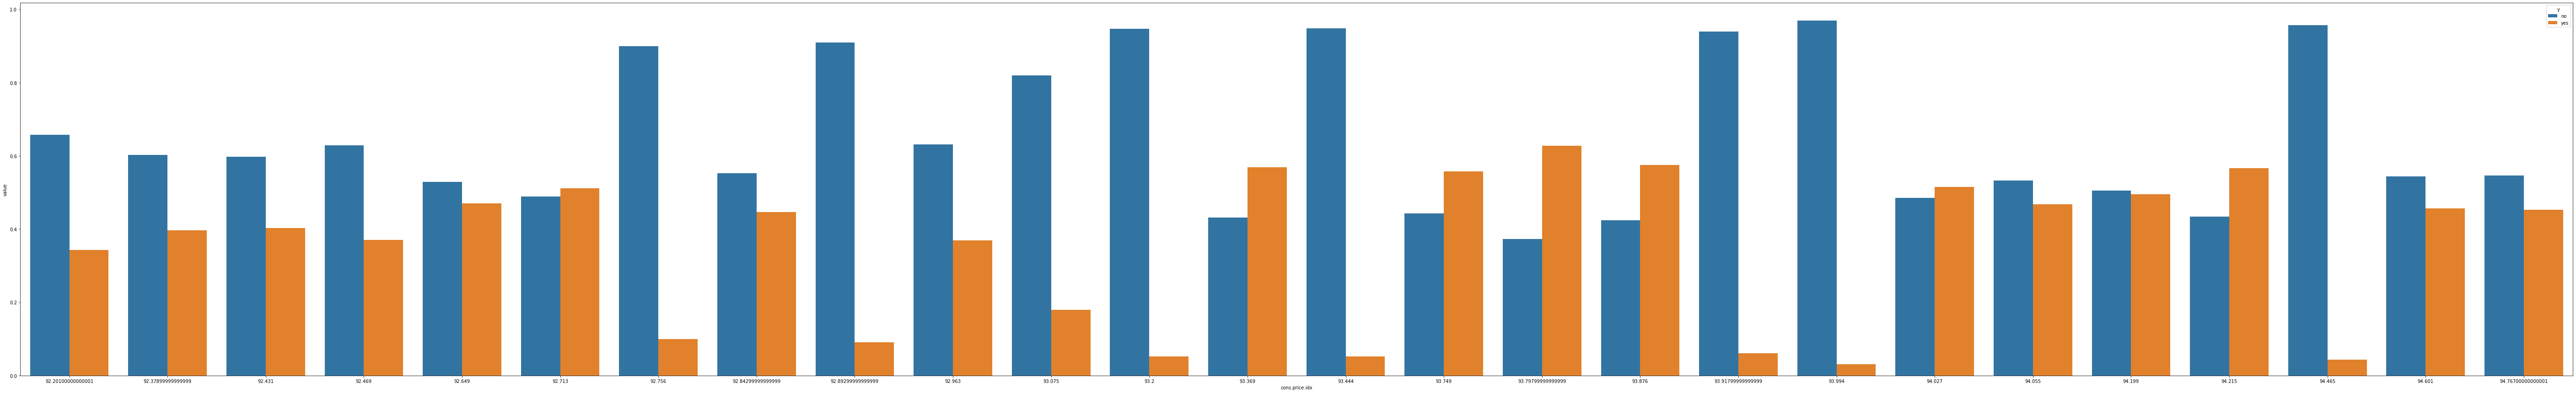

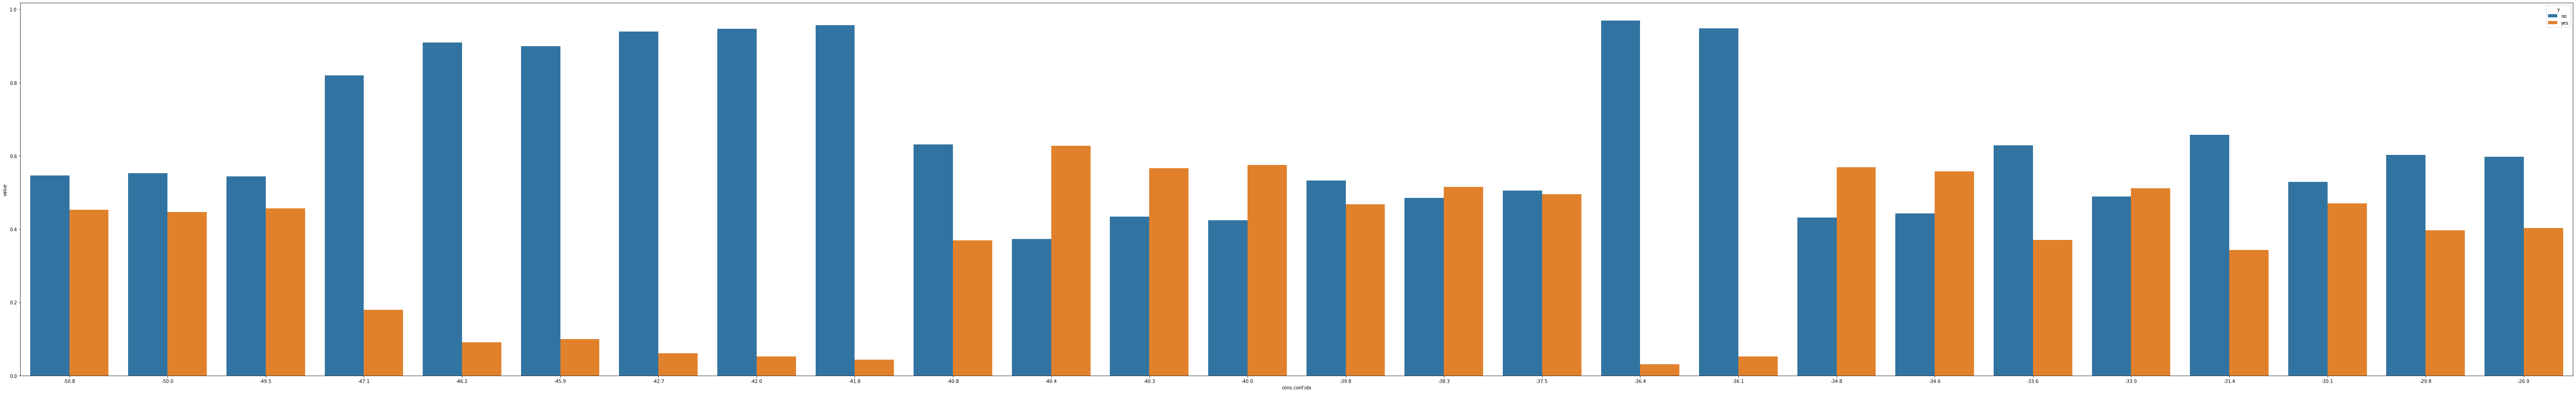

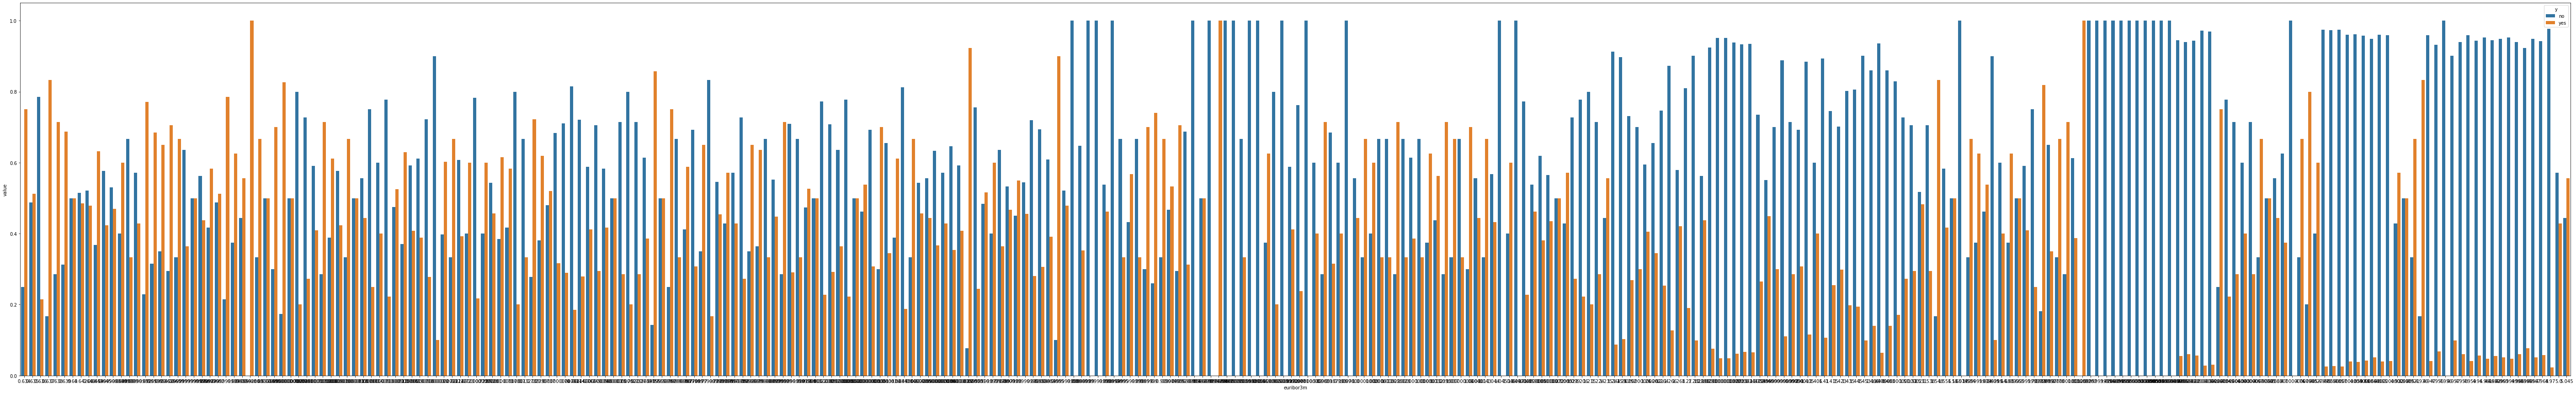

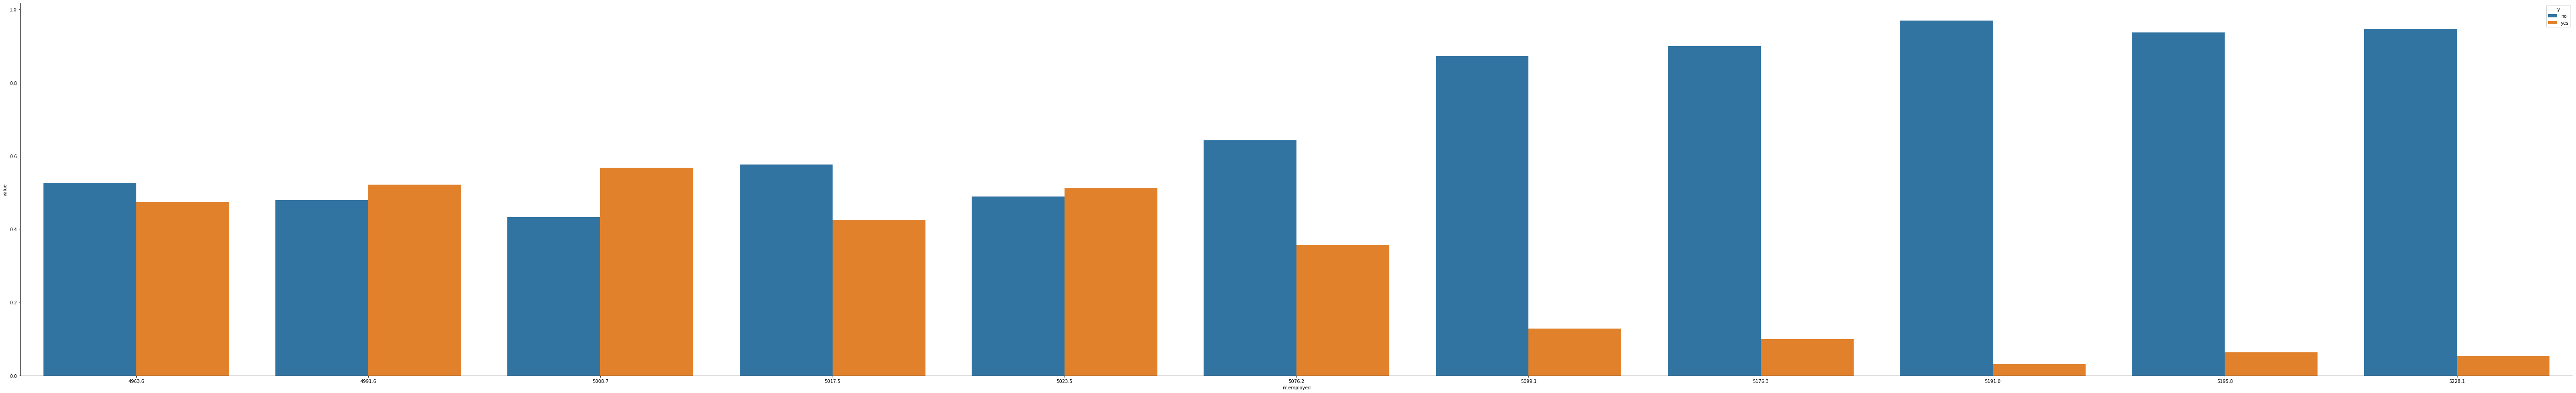

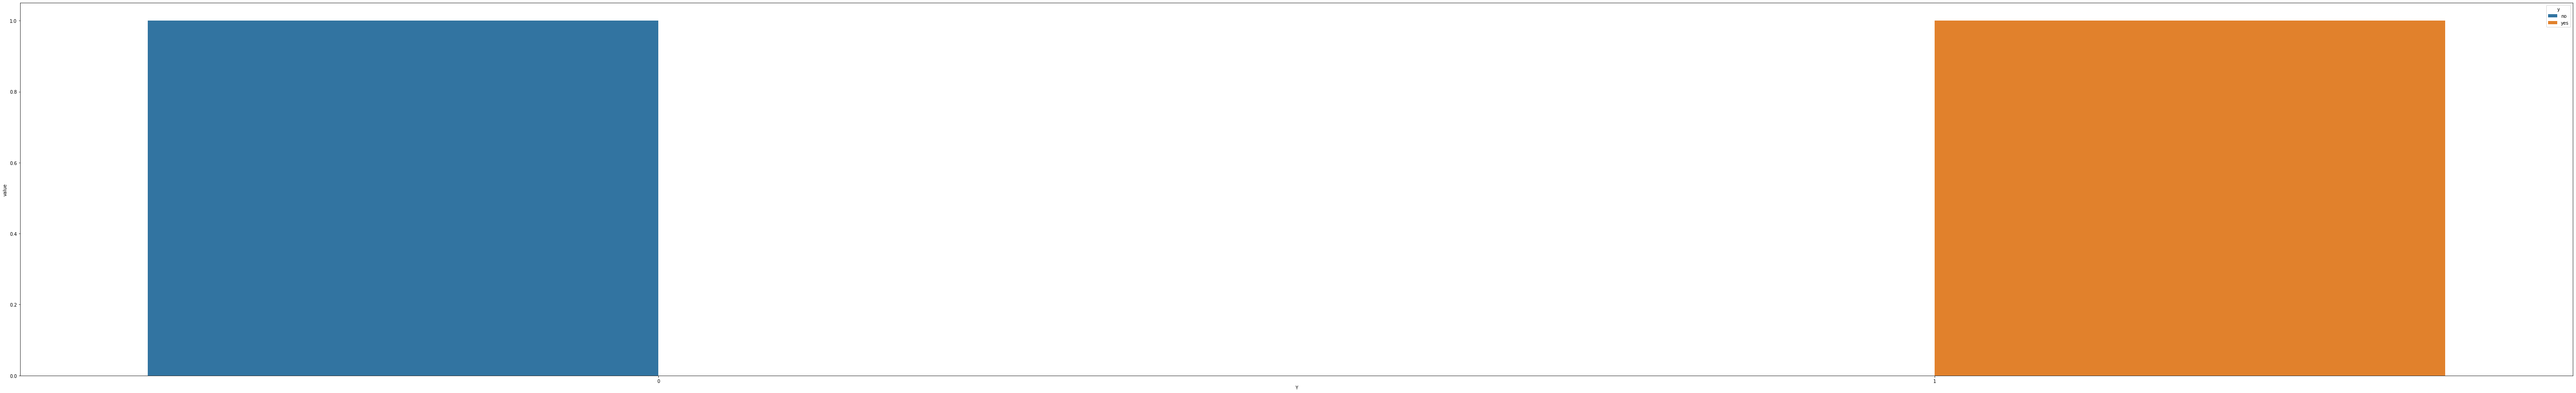

In [23]:
df=bankdata1.drop(['y'],axis=1)
for i in df.columns:
  ct=pd.crosstab(bankdata1[i],bankdata1['y']).apply(lambda r: r/r.sum(), axis=1)
  stacked = ct.stack().reset_index().rename(columns={0:'value'})
  plt.figure(figsize=(100,15))
  sns.barplot(x=stacked[i], y=stacked.value, hue=stacked['y'])

**Heatmap to see positive/negative correlation between variables**

<AxesSubplot:>

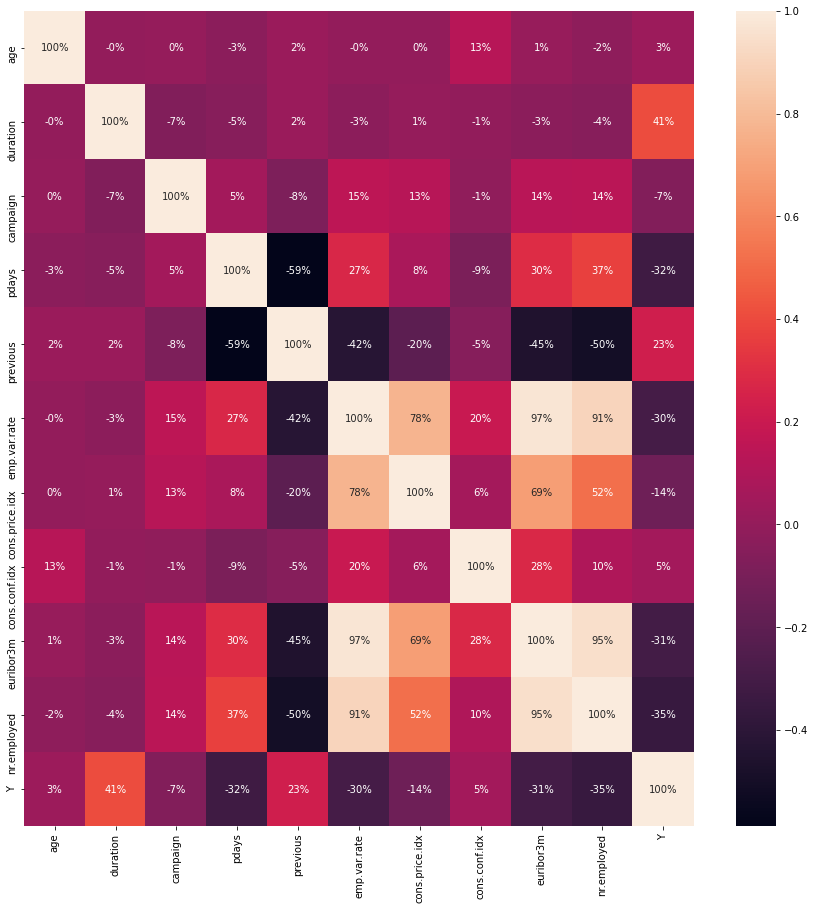

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(bankdata1.corr(),annot=True, fmt='.0%')

**We can see that there is a positive correlation between the social and economic indicators like **

 **1. emp.var.rate: employment variation rate - quarterly indicator (numeric)**
 **2. cons.price.idx: consumer price index - monthly indicator (numeric)**
 **3. euribor3m: euribor 3 month rate - daily indicator (numeric)**
 **4. employed: number of employees - quarterly indicator (numeric)**

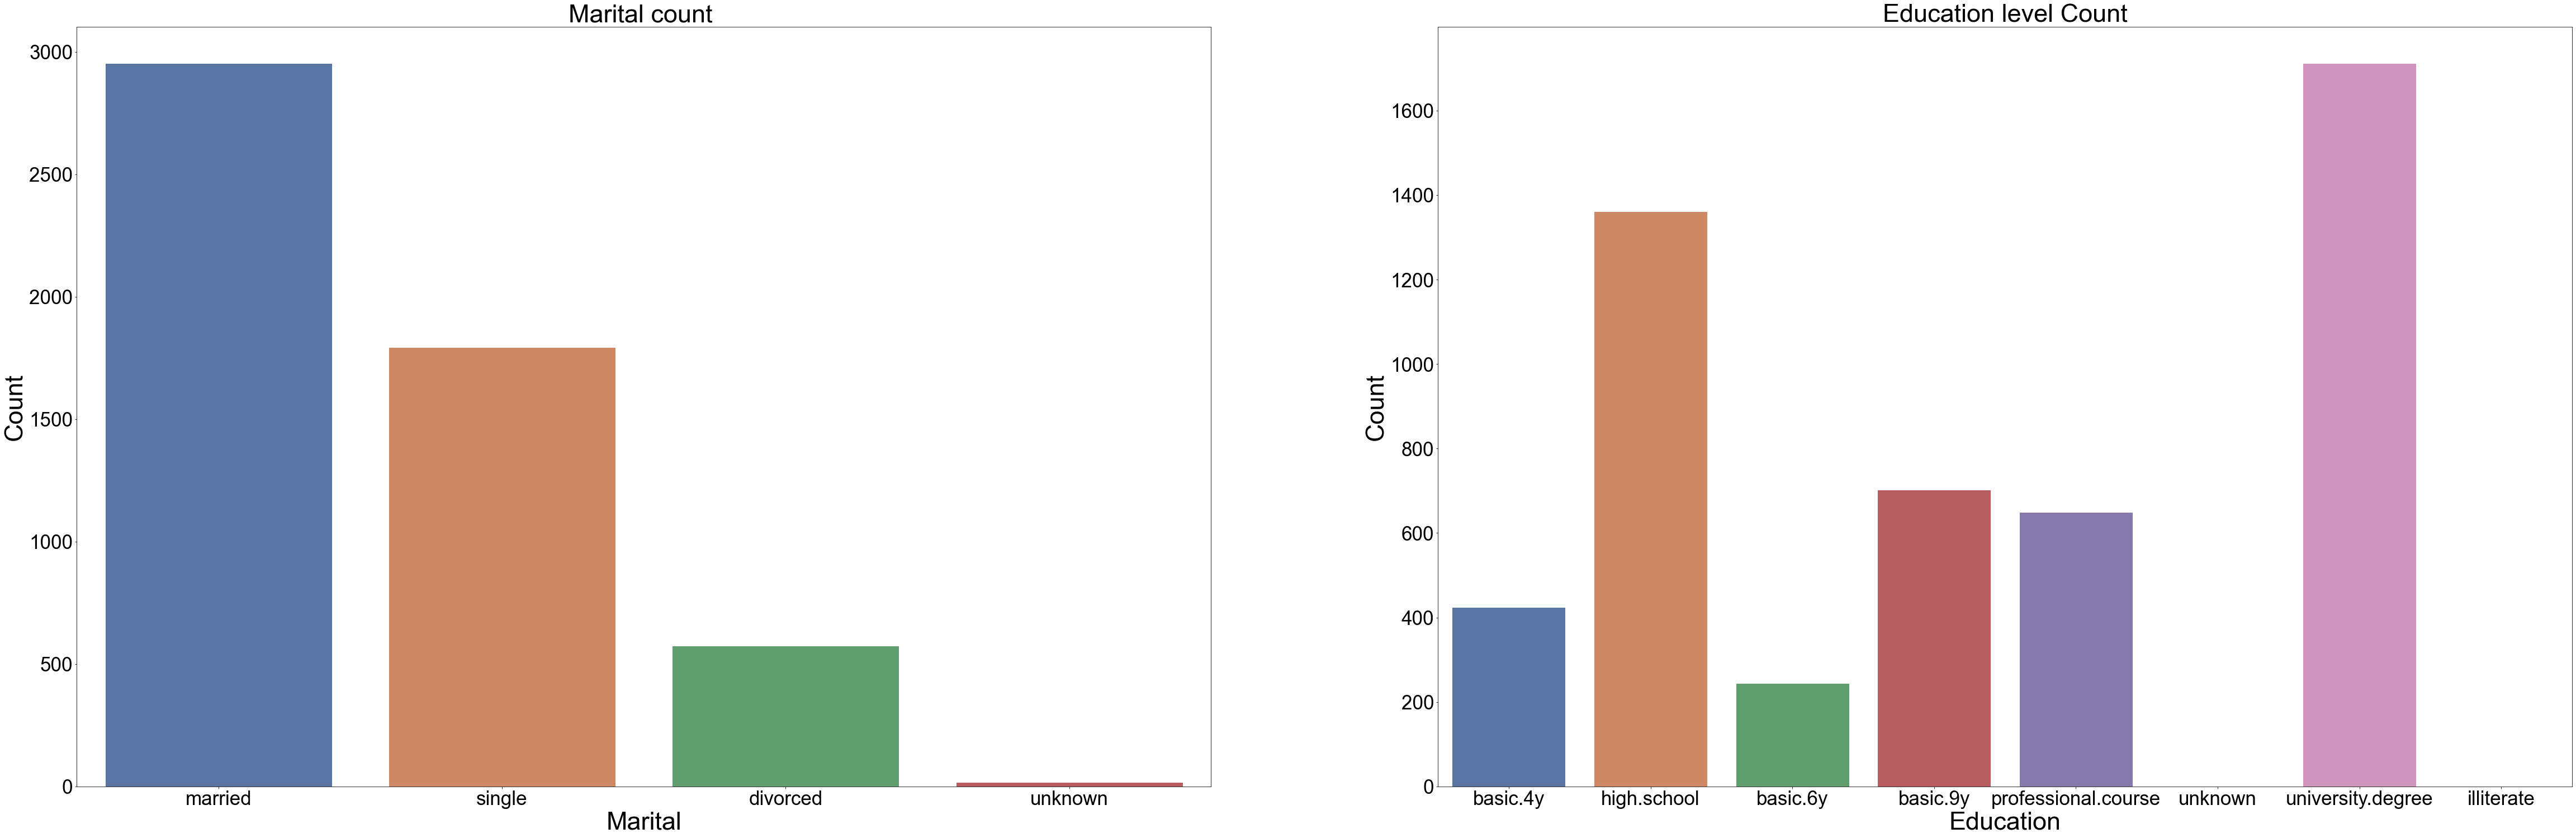

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(80,25))

#Count of marital status
sns.set(font_scale=4)
sns.countplot(x = 'marital', data=bankdata,ax=ax1, order=['married', 'single', 'divorced', 'unknown'])
ax1.set_title('Marital count ', fontsize=45)
ax1.set_xlabel('Marital', fontsize=45)
ax1.set_ylabel('Count', fontsize=45)
ax1.tick_params(labelsize=35)
sns.set_style('whitegrid')

#Count of education level
sns.set(font_scale=4)
sns.countplot(x = 'education', data =bankdata, ax=ax2,order=['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'])
ax2.set_title('Education level Count', fontsize=45)
ax2.set_xlabel('Education', fontsize=45)
ax2.set_ylabel('Count', fontsize=45)
ax2.tick_params(labelsize=35)
sns.set_style('whitegrid')



Married and university educated people is large in number

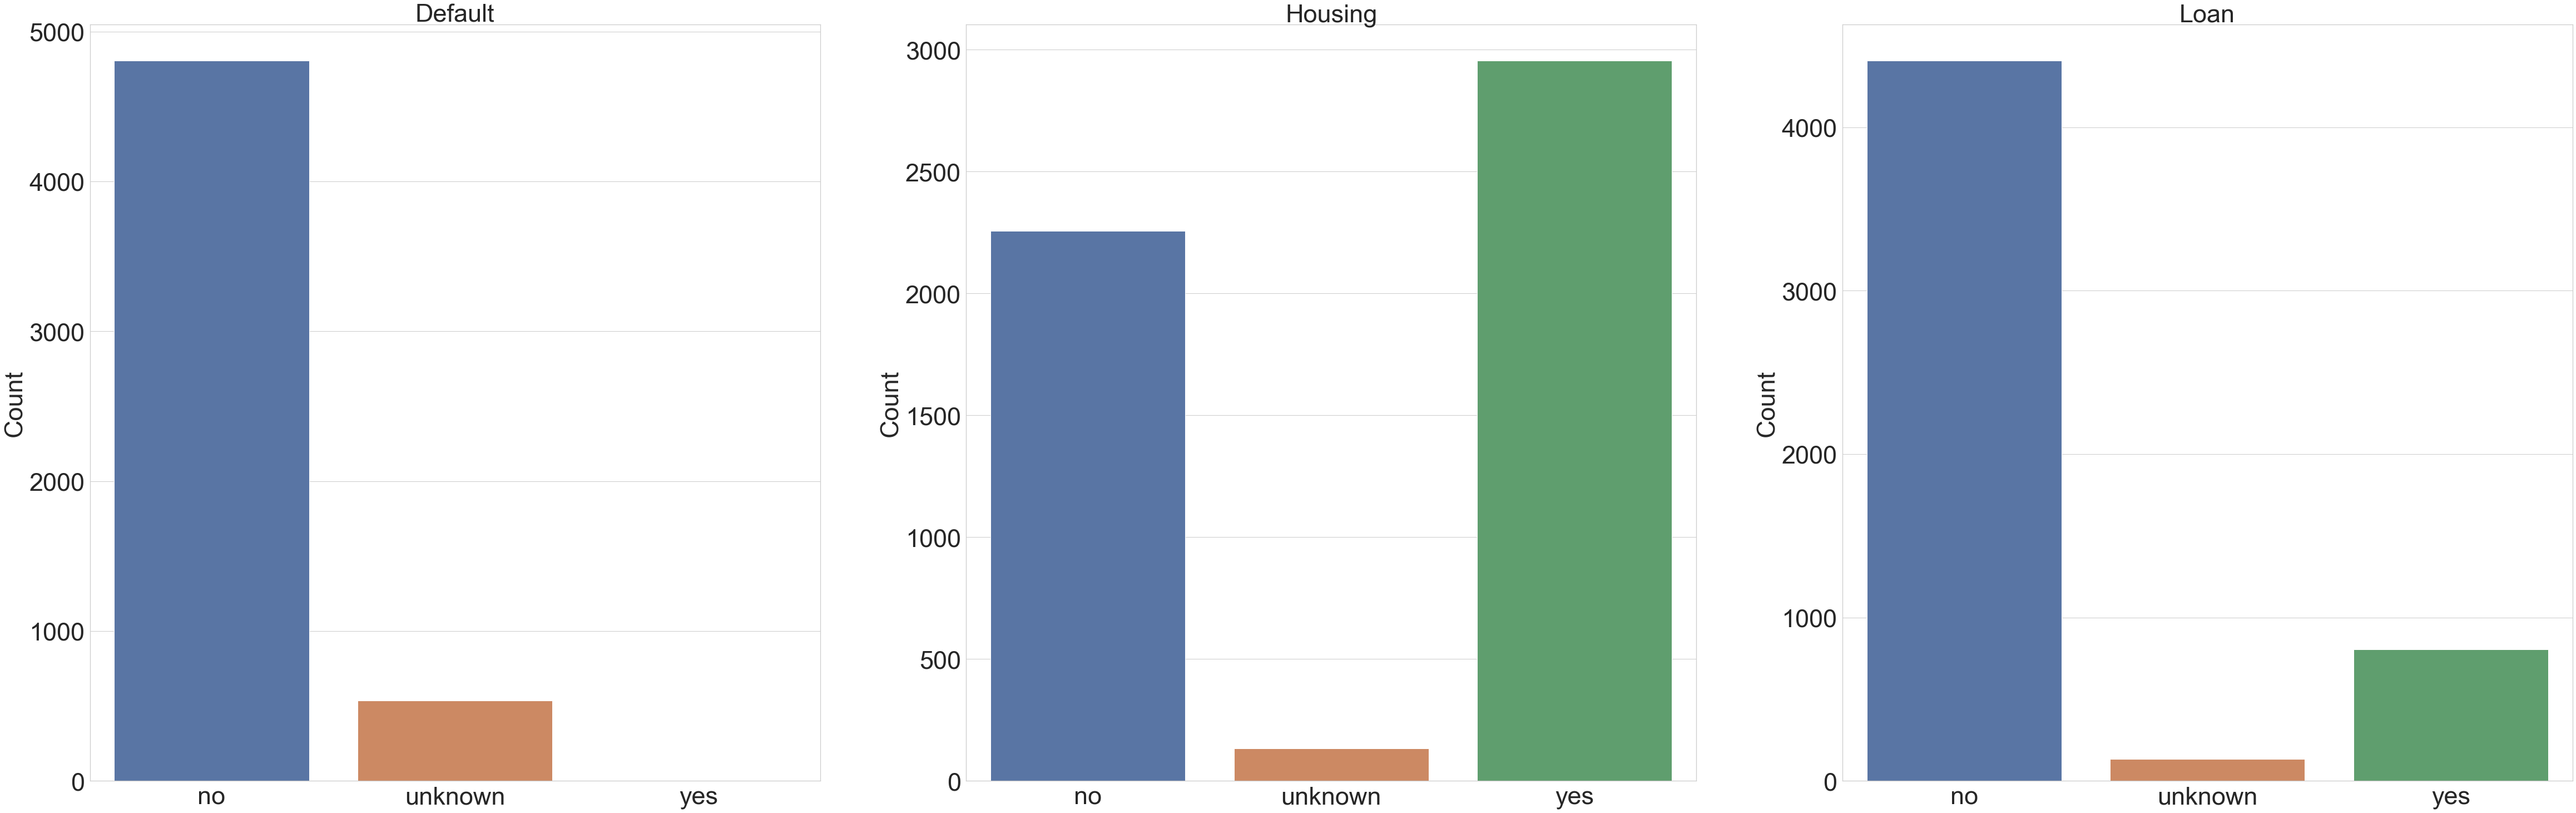

In [26]:
# Default
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (80,25))
sns.countplot(x = 'default', data = bankdata, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=45)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=45)
ax1.tick_params(labelsize=45)

# Housing
sns.countplot(x = 'housing', data = bankdata, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=45)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=45)
ax2.tick_params(labelsize=45)

# Loan      
sns.countplot(x = 'loan', data = bankdata, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=45)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=45)
ax3.tick_params(labelsize=45)

The loan defaulting was very miniscule , most of them have housing and loans taken are less

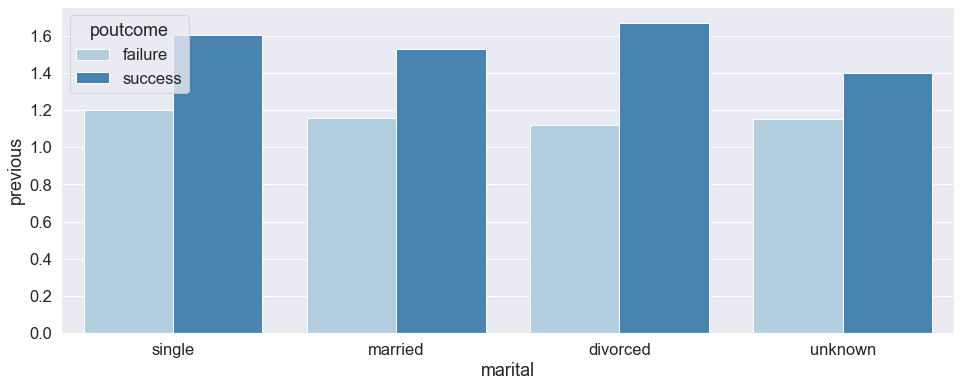

In [27]:
plt.figure(figsize = (16,6))


sns.set(font_scale=1.5)
sns.barplot(x='marital',y='previous', hue ='poutcome', ci=0, data=bankdata, palette ='Blues')
sns.set_style('whitegrid')



In previous campaign, divorced and single people responded positively

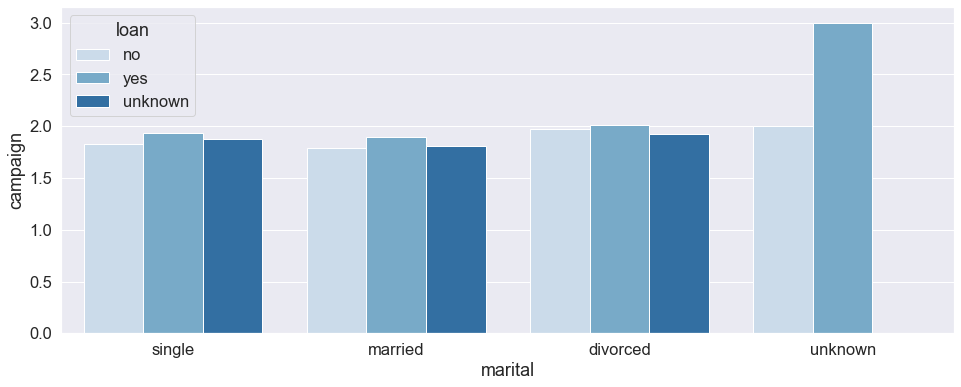

In [28]:
plt.figure(figsize = (16,6))


sns.set(font_scale=1.5)
sns.barplot(x='marital',y='campaign', hue ='loan', ci=0, data=bankdata, palette ='Blues')
sns.set_style('whitegrid')


The recent campaign was same as that of previousmand targeted mainly on divorced, single and married people.

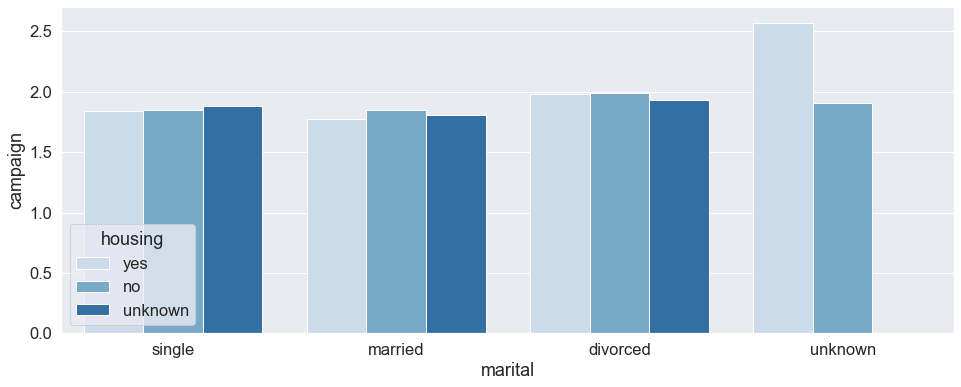

In [29]:
plt.figure(figsize = (16,6))


sns.set(font_scale=1.5)
sns.barplot(x='marital',y='campaign', hue ='housing', ci=0, data=bankdata, palette ='Blues')
sns.set_style('whitegrid')

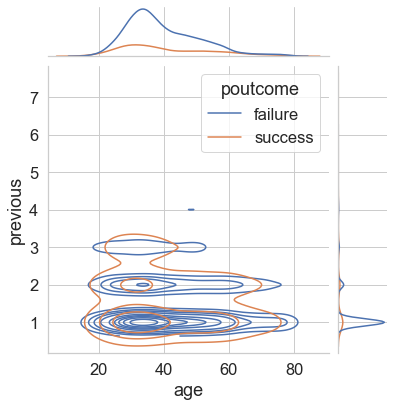

In [30]:
sns.jointplot(data=bankdata, x="age", y="previous", hue="poutcome", kind="kde")

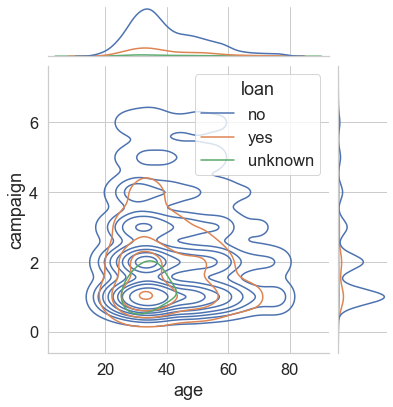

In [31]:
sns.jointplot(data=bankdata, x="age", y="campaign", hue="loan", kind="kde")

The previous outcome of campaign and loan was widely RESPONSIVE among ages less than 30 and above 70

**Converting categorical data into numerical data**

Since machine learning algorithms only take numerical values, all categorical variables are transformed into dummy variables.

Using the BinaryEncoder from the category_encoders library. Using this approach we can convert multiple categorical columns into dummy variables in a single go.

**category_encoders**: The category_encoders is a Python library developed under the scikit-learn-transformers library. The primary objective of this library is to convert categorical variables into quantifiable numeric variables. 

In [32]:
df = bankdata.drop(['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y','Y', 'outliers',
       'outliers_d', 'outliers_c' ], axis = 1)

In [33]:
print(df.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')


In [34]:
!pip install category_encoders

In [35]:
# importing the libraries
import category_encoders as cat_encoder
  

# creating an object BinaryEncoder
# this code calls all columns
# we can specify specific columns as well
encoder = cat_encoder.BinaryEncoder(cols = df.columns)
  
# fitting the columns to a data frame
df_category_encoder = encoder.fit_transform( df )
  
display(df_category_encoder)

C:\Users\Anita George\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,job_0,job_1,job_2,job_3,job_4,marital_0,marital_1,marital_2,education_0,education_1,...,education_3,default_0,default_1,default_2,housing_0,housing_1,housing_2,loan_0,loan_1,loan_2
24013,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
24019,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
24076,0,0,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
24102,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
24108,0,0,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
41175,0,1,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
41178,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
41182,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1


In [36]:
bankdata = bankdata.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'y','poutcome', 'outliers',
       'outliers_d', 'outliers_c' ], axis = 1)
print(bankdata.columns)
bankdata = pd.merge(bankdata, df_category_encoder, left_index = True, right_index = True)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'Y'],
      dtype='object')


In [37]:
bankdata.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_3,default_0,default_1,default_2,housing_0,housing_1,housing_2,loan_0,loan_1,loan_2
24013,38,39,1,999,1,-0.1,93.798,-40.4,4.968,5195.8,...,1,0,0,1,0,0,1,0,0,1
24019,40,144,1,999,1,-0.1,93.798,-40.4,4.968,5195.8,...,0,0,0,1,0,0,1,0,0,1
24076,36,449,1,999,1,-0.1,93.200,-42.0,4.663,5195.8,...,1,0,0,1,0,0,1,0,0,1
24102,36,114,1,999,1,-0.1,93.200,-42.0,4.286,5195.8,...,0,0,0,1,0,0,1,0,0,1
24108,37,119,1,6,1,-0.1,93.200,-42.0,4.286,5195.8,...,1,0,0,1,0,0,1,0,0,1


# Feature Selection

The values of the first 20 columns, which contain customer statistics, are selected as features while the value of the last column, 'campaign outcome', is set as target.

In [38]:
# Target variable: 'y'
y = bankdata['Y']

# Features
X = bankdata.drop(['Y'], axis = 1)



In [39]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[5.22722455e-02 1.82327474e-01 3.89914197e-02 2.97843832e-01
 2.44355654e-02 2.08688391e-02 2.42934394e-02 3.92272680e-02
 5.81758663e-02 4.87158298e-02 0.00000000e+00 1.30718621e-02
 1.70335861e-02 2.02899252e-02 2.02542078e-02 2.81568104e-04
 1.51743477e-02 1.63952763e-02 0.00000000e+00 1.50167250e-02
 1.60836382e-02 2.12604347e-02 0.00000000e+00 4.03476214e-03
 4.05026656e-03 0.00000000e+00 1.46611373e-02 1.44256724e-02
 0.00000000e+00 1.09125898e-02 9.90222169e-03]


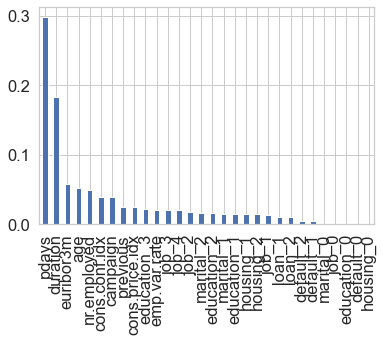

In [40]:
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(30).plot(kind='bar')
plt.show()

# Train and Test datas

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=bankdata.Y)

# Machine Learning : Classification (Automation)

In [43]:
!pip install tpot

  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11959 sha256=6809230a2acd1d40fadc645ddafb637e33ffb07c279d519b72d9bdc8b31f3567
  Stored in directory: c:\users\anita george\appdata\local\pip\cache\wheels\a8\bb\8f\6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit


In [44]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.9137827447725885

Generation 2 - Current best internal CV score: 0.9137827447725885

Generation 3 - Current best internal CV score: 0.9137827447725885

Generation 4 - Current best internal CV score: 0.9137827447725885

Generation 5 - Current best internal CV score: 0.9138099000086667

Best pipeline: KNeighborsClassifier(LogisticRegression(input_matrix, C=10.0, dual=False, penalty=l2), n_neighbors=46, p=1, weights=distance)

AUC score: 0.9035

Best pipeline steps:
1. StackingEstimator(estimator=LogisticRegression(C=10.0, random_state=42))
2. KNeighborsClassifier(n_neighbors=46, p=1, weights='distance')


# Machine Learning : Classification

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

**Train and fit a logistic regression model on the training set.**

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Anita George\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

**Create a classification report for the model.**

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1189
           1       0.71      0.67      0.69       415

    accuracy                           0.84      1604
   macro avg       0.80      0.79      0.79      1604
weighted avg       0.84      0.84      0.84      1604



In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1074  115]
 [ 137  278]]


In [51]:
lgscore_trn = logmodel.score(X_train, y_train)
print("Logistic Regression training values=",lgscore_trn)
lgscore_ts = logmodel.score(X_test, y_test)
print("Logistic Regression test values=",lgscore_ts)

Logistic Regression training values= 0.8524064171122995
Logistic Regression test values= 0.8428927680798005


# K Nearest Neighbour

**Import KNeighborsClassifier from scikit learn, Create a KNN model instance with n_neighbors=1 and fit it to a training data.**

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

**Create a confusion matrix and classification report.**

In [57]:
print(confusion_matrix(y_test,pred))

[[1020  169]
 [ 159  256]]


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1189
           1       0.60      0.62      0.61       415

    accuracy                           0.80      1604
   macro avg       0.73      0.74      0.74      1604
weighted avg       0.80      0.80      0.80      1604



**Choosing a K Value - use the elbow method to pick a good K Value**

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [59]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**create the following plot using the information from the for loop.**

Text(0, 0.5, 'Error Rate')

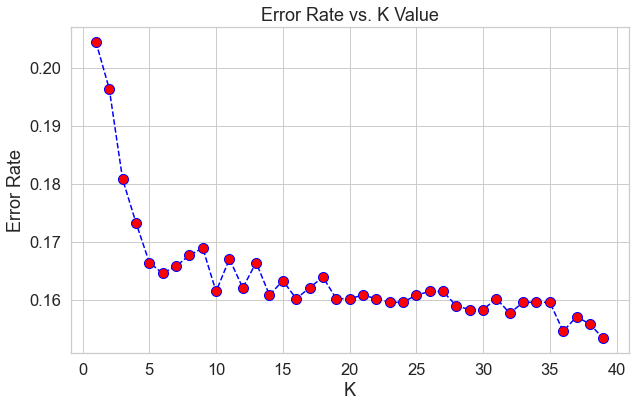

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Retrain with new K Value**
**Retrain the model with the best K value and re-do the classification report and the confusion matrix.**

In [61]:
# NOW WITH KNN from tpot
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=46, p=1,
                     weights='distance')

knn.fit(X_train,y_train)
k_predictions = knn.predict(X_test)

print('KNN frim tpot')
print('\n')
print(confusion_matrix(y_test,k_predictions))
print('\n')
print(classification_report(y_test,k_predictions))

KNN frim tpot


[[1054  135]
 [ 120  295]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1189
           1       0.69      0.71      0.70       415

    accuracy                           0.84      1604
   macro avg       0.79      0.80      0.80      1604
weighted avg       0.84      0.84      0.84      1604



In [85]:
# NOW WITH K=46
knn = KNeighborsClassifier(n_neighbors=46)

knn.fit(X_train,y_train)
k_predictions = knn.predict(X_test)

print('WITH K=46')
print('\n')
print(confusion_matrix(y_test,k_predictions))
print('\n')
print(classification_report(y_test,k_predictions))

WITH K=46


[[1073  116]
 [ 123  292]]


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1189
           1       0.72      0.70      0.71       415

    accuracy                           0.85      1604
   macro avg       0.81      0.80      0.80      1604
weighted avg       0.85      0.85      0.85      1604



In [86]:
knnscore_trn = knn.score(X_train, y_train)
print("KNN training values=",knnscore_trn)
knnscore_ts = knn.score(X_test, y_test)
print("KNN test values=",knnscore_ts)

KNN training values= 0.8590909090909091
KNN test values= 0.850997506234414


# Random Forest

**Create an instance of the RandomForestClassifier class and fit it to our training data**

In [64]:
from sklearn.ensemble import RandomForestClassifier

Parameters of random forest that can be tuned for the model’s better performance.

In [65]:
rfc = RandomForestClassifier(max_depth=20, max_features=1, min_samples_leaf= 20, n_estimators=500 )

In [66]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_features=1, min_samples_leaf=20,
                       n_estimators=500)

In [67]:
r_predictions = rfc.predict(X_test)

**Now create a classification report from the results**

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(y_test,r_predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1189
           1       0.83      0.39      0.53       415

    accuracy                           0.82      1604
   macro avg       0.82      0.68      0.71      1604
weighted avg       0.82      0.82      0.80      1604



In [70]:
print(confusion_matrix(y_test,predictions))

[[1074  115]
 [ 137  278]]


In [71]:
rfcscore_trn = rfc.score(X_train, y_train)
print("RFC training values=",rfcscore_trn)
rfcscore_ts = rfc.score(X_test, y_test)
print("RFC test values=",rfcscore_ts)

RFC training values= 0.8342245989304813
RFC test values= 0.8204488778054863


# Support Vector Classifier

**Call the SVC() model from sklearn and fit the model to the training data.**

In [72]:
from sklearn.svm import SVC

In [73]:
svc_model = SVC()

In [74]:
svc_model.fit(X_train,y_train)

SVC()

In [75]:
svc_predictions = svc_model.predict(X_test)

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(confusion_matrix(y_test,svc_predictions))

[[1012  177]
 [ 142  273]]


In [78]:
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1189
           1       0.61      0.66      0.63       415

    accuracy                           0.80      1604
   macro avg       0.74      0.75      0.75      1604
weighted avg       0.81      0.80      0.80      1604



In [79]:
svcscore_trn = svc_model.score(X_train, y_train)
print("SVC training values=",svcscore_trn)
svcscore_ts = svc_model.score(X_test, y_test)
print("SVC test values=",svcscore_ts)

SVC training values= 0.8213903743315508
SVC test values= 0.8011221945137157


# Model Evaluation

In [80]:
M = {'Classifier_ Model': ['LogReg', 'KNN', 'RFC', 'SVC'], 
     'Training value':[lgscore_trn, knnscore_trn, rfcscore_trn, svcscore_trn], 
     'Test Value': [lgscore_ts, knnscore_ts, rfcscore_ts, svcscore_ts],}
M_evaluation = pd.DataFrame(M)
print(M_evaluation)

  Classifier_ Model  Training value  Test Value
0            LogReg        0.852406    0.842893
1               KNN        1.000000    0.841022
2               RFC        0.834225    0.820449
3               SVC        0.821390    0.801122


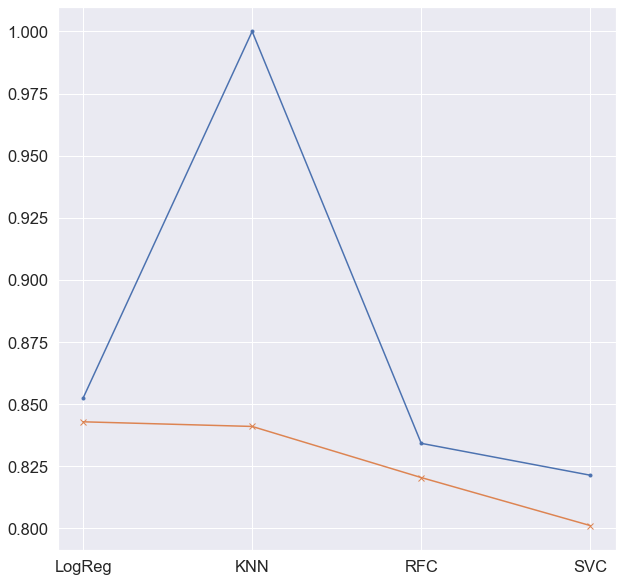

In [81]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
plt.plot(M_evaluation['Classifier_ Model'], M_evaluation['Training value'], marker = '.')
plt.plot(M_evaluation['Classifier_ Model'],M_evaluation['Test Value'], marker = 'x')
plt.show()

According to previous analysis, a target customer profile can be established. The most responsive customers possess these features: age < 30 or age > 60. 

By applying KNN and logistic regression algorithms, classification  models were successfully built. With these two models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.
In conclusion we can say that KNN predicted more accurately if the client will subscribe (yes/no) to a term deposit. To avoid the problems of overfitting, large adequate amount of data helps machine learning models to find patterns easily.